<h3><center>Implementing and Evaluating a Series of Regression Models
    <br>By Anna Imhoff and Randy Leon</br></h3></center>

<h3><b>Introduction</b></h3>

The Graduation Rate and Outcomes data used for this exercise can be found under the Graduate Rate Database section of the [NY State Education Department (NYSED)](https://data.nysed.gov/downloads.php).  First, we will upload the data set to our Github repository.  The original data set contains 73,152 observations and 28 attributes.  The response variable will be the dropout count.  Exploratory data analysis will be performed on the variables to familiarize us with the high school graduation attributes, identify trends and missing data, and gather preliminary predictive inferences.  We will apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included in our three regression models: Poisson, negative binomial, and multiple linear.  We will find which model is the best at predicting if a student will drop out of high school.

<b>Data Set Attributes</b><br> 
1) report_school_year - Indicates school year for which high school graduation info is being reported (**categorical**) <br>
2) aggregation_index - Numeric code identifying manner in which high school graduation data has been aggregated (**categorical**) <br>
3) aggregation_type - Text description of how high school graduation data has been aggregated (**categorical**) <br>
4) nrc_code - Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district (**categorical**) <br>
5) nrc_desc - Text description of the type of school district (**categorical**)<br>
6) county_code - Numeric code for county name (**categorical**) <br>
7) county_name - Full name of applicable NY State county (**categorical**) <br>
8) nyc_ind - Indicates whether or not the school district resides within the borders of NYC (**categorical**) <br>
9) membership_desc - Indicates school year in which students first enrolled in High School (**categorical**) <br>
10) subgroup_code - Numeric code identifying student subgrouping (**categorical**) <br>
11) subgroup_name - Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.) (**categorical**) <br>
&nbsp;&nbsp;   1 - All Students <br>
&nbsp;&nbsp;Female + Male = All Students 98% of the time in this data set.<br>
&nbsp;&nbsp;    2 - Female  <br>
&nbsp;&nbsp;   3 - Male <br>
&nbsp;&nbsp;    4 - American Indian/Alaska Native <br>
&nbsp;&nbsp;    5 - Black <br>
&nbsp;&nbsp;    6 - Hispanic  
&nbsp;&nbsp;    7 - Asian/Pacific Islander <br>
&nbsp;&nbsp;    8 - White <br> 
&nbsp;&nbsp;    9 - Multiracial<br>
&nbsp;&nbsp;    10 - General Education Students <br> 
&nbsp;&nbsp;    11 - Students with Disabilities <br> 
&nbsp;&nbsp;    12 - Not English Language Learner <br>
&nbsp;&nbsp;    13 - English Language Learner <br> 
&nbsp;&nbsp;    14 - Formerly English Language Learner <br>
&nbsp;&nbsp;    15 - Econmically Disadvantaged <br>
&nbsp;&nbsp;    16 - Not Economically Disadvantaged  <br>
&nbsp;&nbsp;    17 - Migrant <br>
&nbsp;&nbsp;    18 - Not Migrant <br>
&nbsp;&nbsp;   20 - Homeless <br>
&nbsp;&nbsp;    21 - Not Homeless <br>
&nbsp;&nbsp;    22 - In Foster Care <br>
&nbsp;&nbsp;    23 - Not in Foster Care <br>
&nbsp;&nbsp;    24 - Parent in Armed Forces <br>
&nbsp;&nbsp;    25 - Parent Not in Armed Forces <br>
12) enroll_cnt - How many students of the indicated subgrouping were enrolled during the given school year (**numeric, discrete**) <br>
The number is equal to local_cnt + reg_cnt + reg_adv_cnt + non_diploma_credential_cnt + still_enr_cnt + ged_cnt + dropout_cnt in 93% of the rows in the data set. <br>
13) grad_cnt - How many enrolled students of the indicated subgrouping graduated at the end of the given school year. <br> 
This number is equal to local_cnt + reg_cnt + reg_adv_cnt in 100% of the rows in the data set.(**numeric, discrete**) <br>
14) grad_pct - What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year (**numeric, continuous**) <br> 
15) local_cnt - How many enrolled students of the indicated subgrouping were awarded a "Local" diploma (**numeric, discrete**) <br>
16) local_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma (**numeric, continuous**) <br>
17) reg_cnt - How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma (**numeric, discrete**) <br>
18) reg_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma (**numeric, continuous**) <br>
19) reg_adv_cnt - How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma (**numeric, discrete**) <br>
20) reg_adv_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma (**numeric, continuous**) <br>
21) non_diploma_credential_cnt - How many enrolled students of the indicated subgrouping achieved a non-diploma credential (**numeric, discrete**) <br>
22) non_diploma_credential_pct - What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential (**numeric, continuous**) <br>
23) still_enrolled_cnt - How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled (**numeric, discrete**) <br>
24) still_enrolled_pct - What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled (**numeric, continuous**) <br>
25) ged_cnt - How many enrolled students of the indicated subgrouping were awarded a "GED" diploma (**numeric, discrete**) <br>
26) ged_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma (**numeric, continuous**) <br>
27) dropout_cnt - How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year (**numeric, discrete**) <br>
28) dropout_pct -What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year (**numeric, continuous**)

<h3><b>Data Preparation</b></h3>

In [12]:
#Import libraries and packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Read in the csv from Github
df = pd.read_csv("https://raw.githubusercontent.com/annaimhoff/DAV-6150/main/Project1_Data.csv", sep=',')
                 
#View the data frame to ensure that the desired columns were selected
df.head()

ModuleNotFoundError: No module named 'missingno'

Convert the "-" to NaN.

In [3]:
#Replace - values with numpy's NaN so that columns can be transformed to the appropriate data type
df = df.replace(to_replace = '-', value = np.nan) 

#Check results
df.head()

NameError: name 'df' is not defined

Remove the % signs from the data set.

In [4]:
#Source: https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

#Select columns that need to have the % sign removed
cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 
        'dropout_pct']

#Remove with regex function
df[cols] = df[cols].replace({'\%': '', ',': ''}, regex=True)

#Check results
df.head()

NameError: name 'df' is not defined

In [5]:
#Check data types
df.info()

NameError: name 'df' is not defined

In [6]:
#Transform enroll_cnt, grad_cnt, grad_pct, local_cnt, local_pct, reg_cnt, reg_pct, reg_adv_cnt, reg_adv_pct, 
#non_diploma_credential_cnt, non_diploma_credential_pct, still_enr_cnt, still_enr_pct, ged_cnt, ged_pct, dropout_cnt, 
#dropout_pct from object to numeric

df[["enroll_cnt", "grad_cnt", "grad_pct", "local_cnt", "local_pct", "reg_cnt", "reg_pct", "reg_adv_cnt", "reg_adv_pct",
"non_diploma_credential_cnt", "non_diploma_credential_pct", "still_enr_cnt", "still_enr_pct", "ged_cnt", "ged_pct", 
"dropout_cnt", "dropout_pct"]] = df[["enroll_cnt", "grad_cnt", "grad_pct", "local_cnt", "local_pct", "reg_cnt", 
"reg_pct", "reg_adv_cnt", "reg_adv_pct", "non_diploma_credential_cnt", "non_diploma_credential_pct", "still_enr_cnt", 
"still_enr_pct", "ged_cnt", "ged_pct", "dropout_cnt", "dropout_pct"]].apply(pd.to_numeric)

#Check results
df.info()

NameError: name 'df' is not defined

<h3><b>Exploratory Data Analysis</b></h3>

In [7]:
#Find the number of rows and columns in the data set.
df.shape

NameError: name 'df' is not defined

In [8]:
#Check the data set for null values
df.isnull().sum()

NameError: name 'df' is not defined

In [9]:
#Visualize the amount of missing data using missingno's bar chart
msno.bar(df);

NameError: name 'msno' is not defined

In [10]:
#Use missingnos matrix to see if there is a pattern to the missing data
ax = msno.matrix(df)
ax.get_figure();

NameError: name 'msno' is not defined

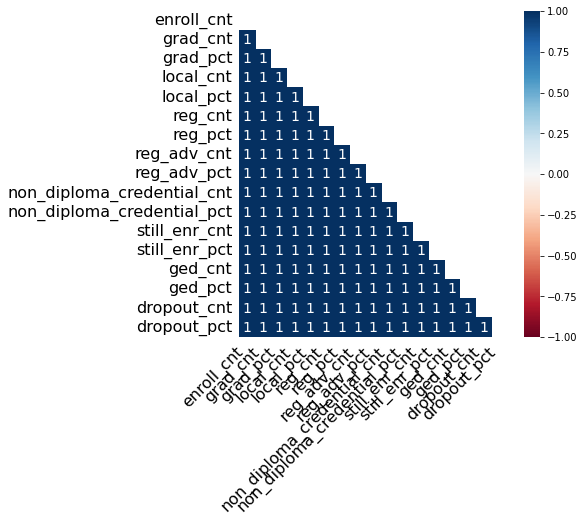

In [10]:
#Graph a heat map of the missing data to see if the locations where the data are missing are correlated.
ax = msno.heatmap(df, figsize = (6,6))
ax.get_figure(); 

We see that there is a pattern to our missing data.  Since the missing values are not random, we will drop all rows that have missing data instead of imputing the missing values.

In [11]:
#Drop the rows with missing values
df = df.dropna()

#Check results
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,71.0,63.0,10.0,310.0,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,76.0,30.0,9.0,169.0,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,20.0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,65.0,33.0,10.0,141.0,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,25.0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,68.0,42.0,11.0,183.0,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,25.0
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98.0,58.0,59.0,13.0,13.0,40.0,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,29.0


In [12]:
#Find the number of rows and columns in the data set.
print(df.shape)

(39674, 29)


By removing the rows with missing values, we went from 73,152 rows to 39,674 rows.

In [13]:
#Check for duplicates
df[df.duplicated()]

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct


There are no duplicate values.

In [14]:
#Get summary statistics for each numeric variable including mean, standard deviation, minimum, maximum, and quartiles
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,39674.0,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.456269,36.774613,0.085245,8.833795,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,43.371125,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
std,0.0,1.367020,20.063556,0.279249,5.768892,439.972474,361.294773,15.679500,32.046302,10.398486,225.795826,17.124891,132.777866,23.001197,6.498913,4.063987,40.766672,8.832710,4.949389,1.985445,50.129834,9.658698
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,21.000000,0.000000,3.000000,25.000000,20.000000,79.000000,1.000000,2.000000,10.000000,33.000000,4.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.0,5.000000,35.000000,0.000000,9.000000,66.000000,57.000000,89.000000,4.000000,6.000000,27.000000,43.000000,18.000000,31.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,5.000000
75%,3.0,5.000000,58.000000,0.000000,15.000000,179.000000,156.000000,95.000000,10.000000,11.000000,69.000000,53.000000,62.000000,49.000000,2.000000,2.000000,5.000000,6.000000,1.000000,0.000000,9.000000,11.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,100.000000,557.000000,100.000000,4752.000000,100.000000,2231.000000,100.000000,279.000000,67.000000,1381.000000,100.000000,97.000000,67.000000,1091.000000,100.000000


Aggregation_index only has the value of 3.<br>

Categorical attributes include nrc_code, county_code, nyc_ind, and subgroup_code.<br>  
There are no negative values in the data set which is what we would expect.  Next, let's look at what is in the first three columns of the data set.

In [15]:
print(df['report_school_year'].value_counts())
print(df['aggregation_index'].value_counts())
print(df['aggregation_type'].value_counts())

2018-19    39674
Name: report_school_year, dtype: int64
3    39674
Name: aggregation_index, dtype: int64
District    39674
Name: aggregation_type, dtype: int64


report_school_year, aggregation_index, and aggregation_type only have one value in each column so we will drop those three columns.

In [16]:
#Drop report_school_year, aggregation_index, and aggregation_type columns since they are non-predictive
df = df.drop(df.columns[[0, 1, 2]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,71.0,63.0,10.0,310.0,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,22.0
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,76.0,30.0,9.0,169.0,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,20.0
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,65.0,33.0,10.0,141.0,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,25.0
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,68.0,42.0,11.0,183.0,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,25.0
5,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98.0,58.0,59.0,13.0,13.0,40.0,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,29.0


Let's also drop nrc_desc, country_name, and subgroup_name since those categorical names have corresponding categorical values.

In [17]:
#Drop nrc_desc, country_name, and subgroup_name columns since they have corresponding categorical values
df = df.drop(df.columns[[2, 4, 8]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,aggregation_name,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658.0,464.0,71.0,63.0,10.0,310.0,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,22.0
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324.0,246.0,76.0,30.0,9.0,169.0,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,20.0
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334.0,218.0,65.0,33.0,10.0,141.0,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,25.0
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367.0,248.0,68.0,42.0,11.0,183.0,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,25.0
5,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,6,98.0,58.0,59.0,13.0,13.0,40.0,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,29.0


Let's take a closer look at membership_desc.

In [18]:
print(df['membership_desc'].value_counts())

2015 Total Cohort - 4 Year Outcome - August 2019    6676
2015 Total Cohort - 4 Year Outcome                  6676
2014 Total Cohort - 5 Year Outcome                  6640
2014 Total Cohort - 5 Year Outcome - August 2019    6640
2013 Total Cohort - 6 Year Outcome                  6521
2013 Total Cohort - 6 Year Outcome - August 2019    6521
Name: membership_desc, dtype: int64


By looking more closely at the [SIRS-201 - Total Cohort - Summary](http://www.p12.nysed.gov/irs/level2reports/reportguides.html), we see that the 4, 5, and 6 year outcomes are for June and August, even though they are not labeled that way in our data set.  We don't want to keep both rows since the numbers are similar.  We will keep the rows from August.

In [19]:
#Remove all rows for which the membership_desc is 2013 Total Cohort - 6 Year Outcome, 2014 Total Cohort - 5 Year Outcome, or
#2015 Total Cohort - 4 Year Outcome
index_names = df[(df['membership_desc'] == '2013 Total Cohort - 6 Year Outcome')].index
df.drop(index_names, inplace = True)

index_names = df[(df['membership_desc'] == '2014 Total Cohort - 5 Year Outcome')].index
df.drop(index_names, inplace = True)

index_names = df[(df['membership_desc'] == '2015 Total Cohort - 4 Year Outcome')].index
df.drop(index_names, inplace = True)

#View the data frame to ensure that the rows were removed
df.head()

,aggregation_name,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
66,ALBANY CITY SCHOOL DISTRICT,3,1,0,2014 Total Cohort - 5 Year Outcome - August 2019,1,678.0,482.0,71.0,65.0,10.0,316.0,47.0,101.0,15.0,14.0,2.0,35.0,5.0,7.0,1.0,140.0,21.0
67,ALBANY CITY SCHOOL DISTRICT,3,1,0,2014 Total Cohort - 5 Year Outcome - August 2019,2,335.0,259.0,77.0,30.0,9.0,170.0,51.0,59.0,18.0,3.0,1.0,14.0,4.0,5.0,1.0,54.0,16.0
68,ALBANY CITY SCHOOL DISTRICT,3,1,0,2014 Total Cohort - 5 Year Outcome - August 2019,3,343.0,223.0,65.0,35.0,10.0,146.0,43.0,42.0,12.0,11.0,3.0,21.0,6.0,2.0,1.0,86.0,25.0
70,ALBANY CITY SCHOOL DISTRICT,3,1,0,2014 Total Cohort - 5 Year Outcome - August 2019,5,356.0,240.0,67.0,48.0,13.0,175.0,49.0,17.0,5.0,10.0,3.0,19.0,5.0,6.0,2.0,81.0,23.0
71,ALBANY CITY SCHOOL DISTRICT,3,1,0,2014 Total Cohort - 5 Year Outcome - August 2019,6,109.0,81.0,74.0,12.0,11.0,58.0,53.0,11.0,10.0,0.0,0.0,5.0,5.0,1.0,1.0,22.0,20.0


In [20]:
#Print the shape of the data frame
print (df.shape)

(19837, 23)


By removing the rows from June, we went from 39,674 rows to 19,837 rows.

In [21]:
#View the value counts to make sure the June rows were deleted as expected
print(df['membership_desc'].value_counts())

2015 Total Cohort - 4 Year Outcome - August 2019    6676
2014 Total Cohort - 5 Year Outcome - August 2019    6640
2013 Total Cohort - 6 Year Outcome - August 2019    6521
Name: membership_desc, dtype: int64


We are only left with the August observations so let's remove the membership_desc column from the data set.

In [22]:
#Drop membership_desc
df = df.drop(df.columns[[4]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,aggregation_name,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
66,ALBANY CITY SCHOOL DISTRICT,3,1,0,1,678.0,482.0,71.0,65.0,10.0,316.0,47.0,101.0,15.0,14.0,2.0,35.0,5.0,7.0,1.0,140.0,21.0
67,ALBANY CITY SCHOOL DISTRICT,3,1,0,2,335.0,259.0,77.0,30.0,9.0,170.0,51.0,59.0,18.0,3.0,1.0,14.0,4.0,5.0,1.0,54.0,16.0
68,ALBANY CITY SCHOOL DISTRICT,3,1,0,3,343.0,223.0,65.0,35.0,10.0,146.0,43.0,42.0,12.0,11.0,3.0,21.0,6.0,2.0,1.0,86.0,25.0
70,ALBANY CITY SCHOOL DISTRICT,3,1,0,5,356.0,240.0,67.0,48.0,13.0,175.0,49.0,17.0,5.0,10.0,3.0,19.0,5.0,6.0,2.0,81.0,23.0
71,ALBANY CITY SCHOOL DISTRICT,3,1,0,6,109.0,81.0,74.0,12.0,11.0,58.0,53.0,11.0,10.0,0.0,0.0,5.0,5.0,1.0,1.0,22.0,20.0


Let's take a closer look at the aggregation_name column.

In [23]:
print(df['aggregation_name'].value_counts())

SYRACUSE CITY SCHOOL DISTRICT                         58
NEW YORK CITY GEOGRAPHIC DISTRICT #15                 54
NEW YORK CITY GEOGRAPHIC DISTRICT #12                 54
BUFFALO CITY SCHOOL DISTRICT                          54
NEW YORK CITY GEOGRAPHIC DISTRICT #14                 54
                                                      ..
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT         2
FISHERS ISLAND UNION FREE SCHOOL DISTRICT              2
BERKSHIRE UNION FREE SCHOOL DISTRICT                   1
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT     1
LONG LAKE CENTRAL SCHOOL DISTRICT                      1
Name: aggregation_name, Length: 677, dtype: int64


There are 677 different school districts. Since we are keeping county, let's delete the school district column since it is so granular and would create a lot of dummy variables if we kept it in the data set.

In [24]:
#Drop the column aggregation_name
df = df.drop(df.columns[[0]], axis=1)

#View the data frame to ensure that the column was removed
df.head()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
66,3,1,0,1,678.0,482.0,71.0,65.0,10.0,316.0,47.0,101.0,15.0,14.0,2.0,35.0,5.0,7.0,1.0,140.0,21.0
67,3,1,0,2,335.0,259.0,77.0,30.0,9.0,170.0,51.0,59.0,18.0,3.0,1.0,14.0,4.0,5.0,1.0,54.0,16.0
68,3,1,0,3,343.0,223.0,65.0,35.0,10.0,146.0,43.0,42.0,12.0,11.0,3.0,21.0,6.0,2.0,1.0,86.0,25.0
70,3,1,0,5,356.0,240.0,67.0,48.0,13.0,175.0,49.0,17.0,5.0,10.0,3.0,19.0,5.0,6.0,2.0,81.0,23.0
71,3,1,0,6,109.0,81.0,74.0,12.0,11.0,58.0,53.0,11.0,10.0,0.0,0.0,5.0,5.0,1.0,1.0,22.0,20.0


We do not need counts and percentages for the numeric columns since they refer to the same data.  We will drop the percent columns.

In [25]:
#Drop grad_pct, local_pct, reg_pct, reg_adv_pct, non_diploma_credential_pct, still_enr_pct, ged_pct, and dropout_pct
df = df.drop(df.columns[[6, 8, 10, 12, 14, 16, 18, 20]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
66,3,1,0,1,678.0,482.0,65.0,316.0,101.0,14.0,35.0,7.0,140.0
67,3,1,0,2,335.0,259.0,30.0,170.0,59.0,3.0,14.0,5.0,54.0
68,3,1,0,3,343.0,223.0,35.0,146.0,42.0,11.0,21.0,2.0,86.0
70,3,1,0,5,356.0,240.0,48.0,175.0,17.0,10.0,19.0,6.0,81.0
71,3,1,0,6,109.0,81.0,12.0,58.0,11.0,0.0,5.0,1.0,22.0


The subgroup_code 1 is for all students while 2 is for female and 3 is for male.  Female + Male = All Student 98% of the time in this data set so having all three listed is redundant.  We will remove the subgroup "1 - All Students" from the data set.

In [26]:
#Drop subgroup_code 1
index_names = df[(df['subgroup_code'] == 1)].index
df.drop(index_names, inplace = True)

#View the data frame to ensure that the rows were removed
df.head()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
67,3,1,0,2,335.0,259.0,30.0,170.0,59.0,3.0,14.0,5.0,54.0
68,3,1,0,3,343.0,223.0,35.0,146.0,42.0,11.0,21.0,2.0,86.0
70,3,1,0,5,356.0,240.0,48.0,175.0,17.0,10.0,19.0,6.0,81.0
71,3,1,0,6,109.0,81.0,12.0,58.0,11.0,0.0,5.0,1.0,22.0
72,3,1,0,7,53.0,44.0,1.0,27.0,16.0,1.0,2.0,0.0,6.0


In [27]:
#Print the shape of the data frame
print (df.shape)

(17814, 13)


By removing subgroup_code 1, we went from 19,837 rows to 17,814.

Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes. 

In [28]:
#Create lists of numerical and categorical attributes

col_cat=['nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']

col_num=['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 
         'ged_cnt', 'dropout_cnt']

print("# of numerical attributes:%s" %len(col_num))
print("# of categorical attributes:%s" %len(col_cat))

# of numerical attributes:9
# of categorical attributes:4


In [29]:
#Import pandas_profiling to perform EDA
import pandas_profiling 

#View the EDA report
pandas_profiling.ProfileReport(df[col_num])

TypeError: ignored

<h4><b>Histograms, Bar Charts and Boxplots</b></h4>

Plot a histogram for each of our numerical attributes

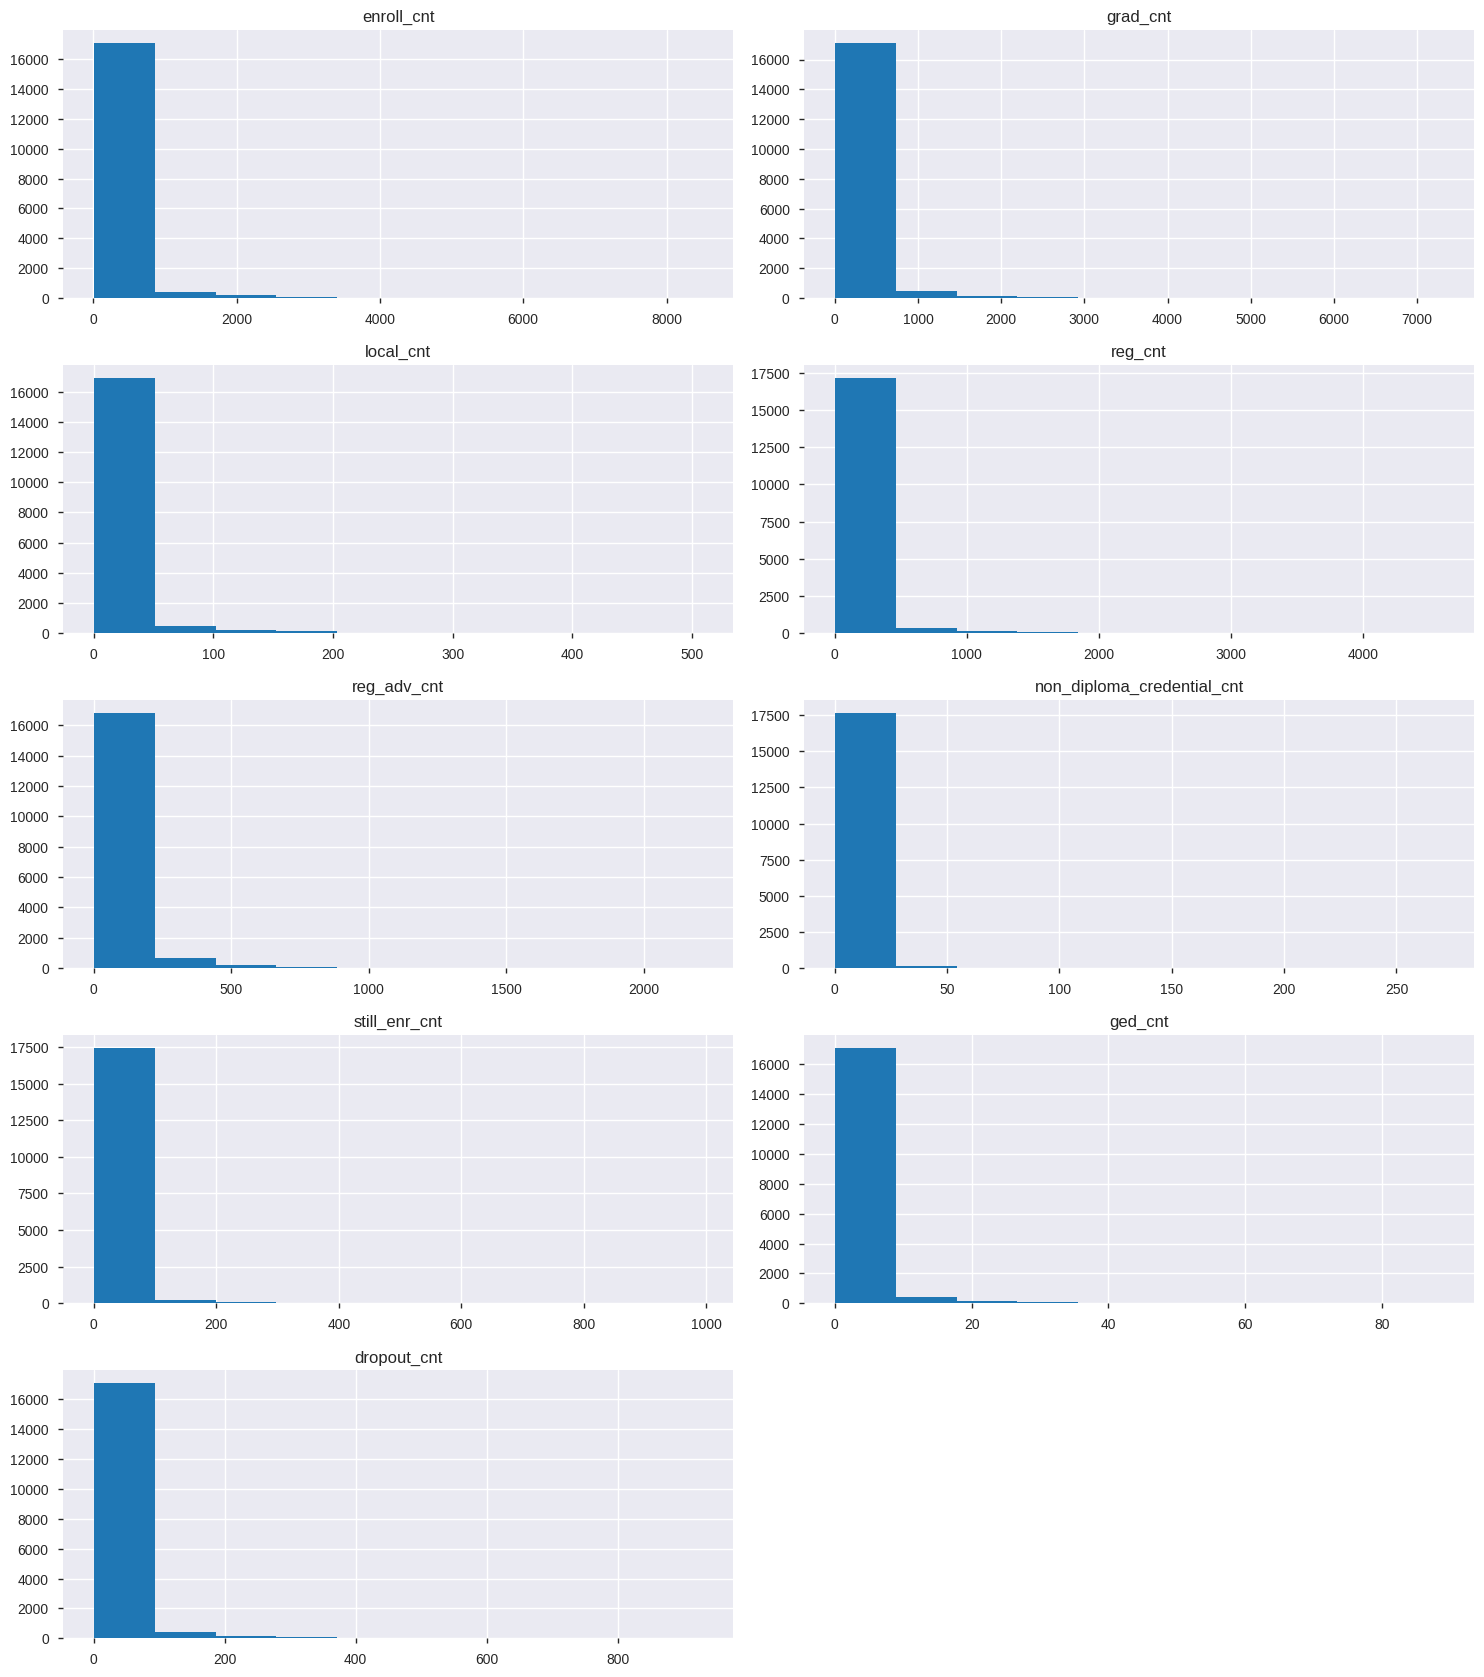

In [30]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(6,2,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

All the histograms are right-skewed.

1) enroll_cnt has 1,463 unique values with a mode of 5, a median of 66, and a mean of 192.<br>
2) grad_cnt has 1,316 unique values with a mode of 5, a median of 57, and a mean of 162.<br>
3) local_cnt has 281 unique values with a mode of 0, a median of 4, and a mean of 12.<br>
4) reg_cnt has 993 unique values with a mode of 3, a median of 27, and a mean of 87.<br>
5) reg_adv_cnt has 705 unique values with a mode of 0, a median of 18, and a mean of 62.<br>
6) non_diploma_credential_cnt as 75 unique values with a mode of 0, a median of 0, and a mean of 2.<br>
7) still_enr_cnt as 301 unique values with a mode of 0, a median of 2, and a mean of 10.<br>
8) ged_cnt has 77 unique values with a mode of 0, a median of 0, and a mean of 1.<br>
9) dropout_cnt has 387 unique values with a mode of 0, a median of 3, and a mean of 16.<br>

Plot a bar chart for each of the categorical attributes

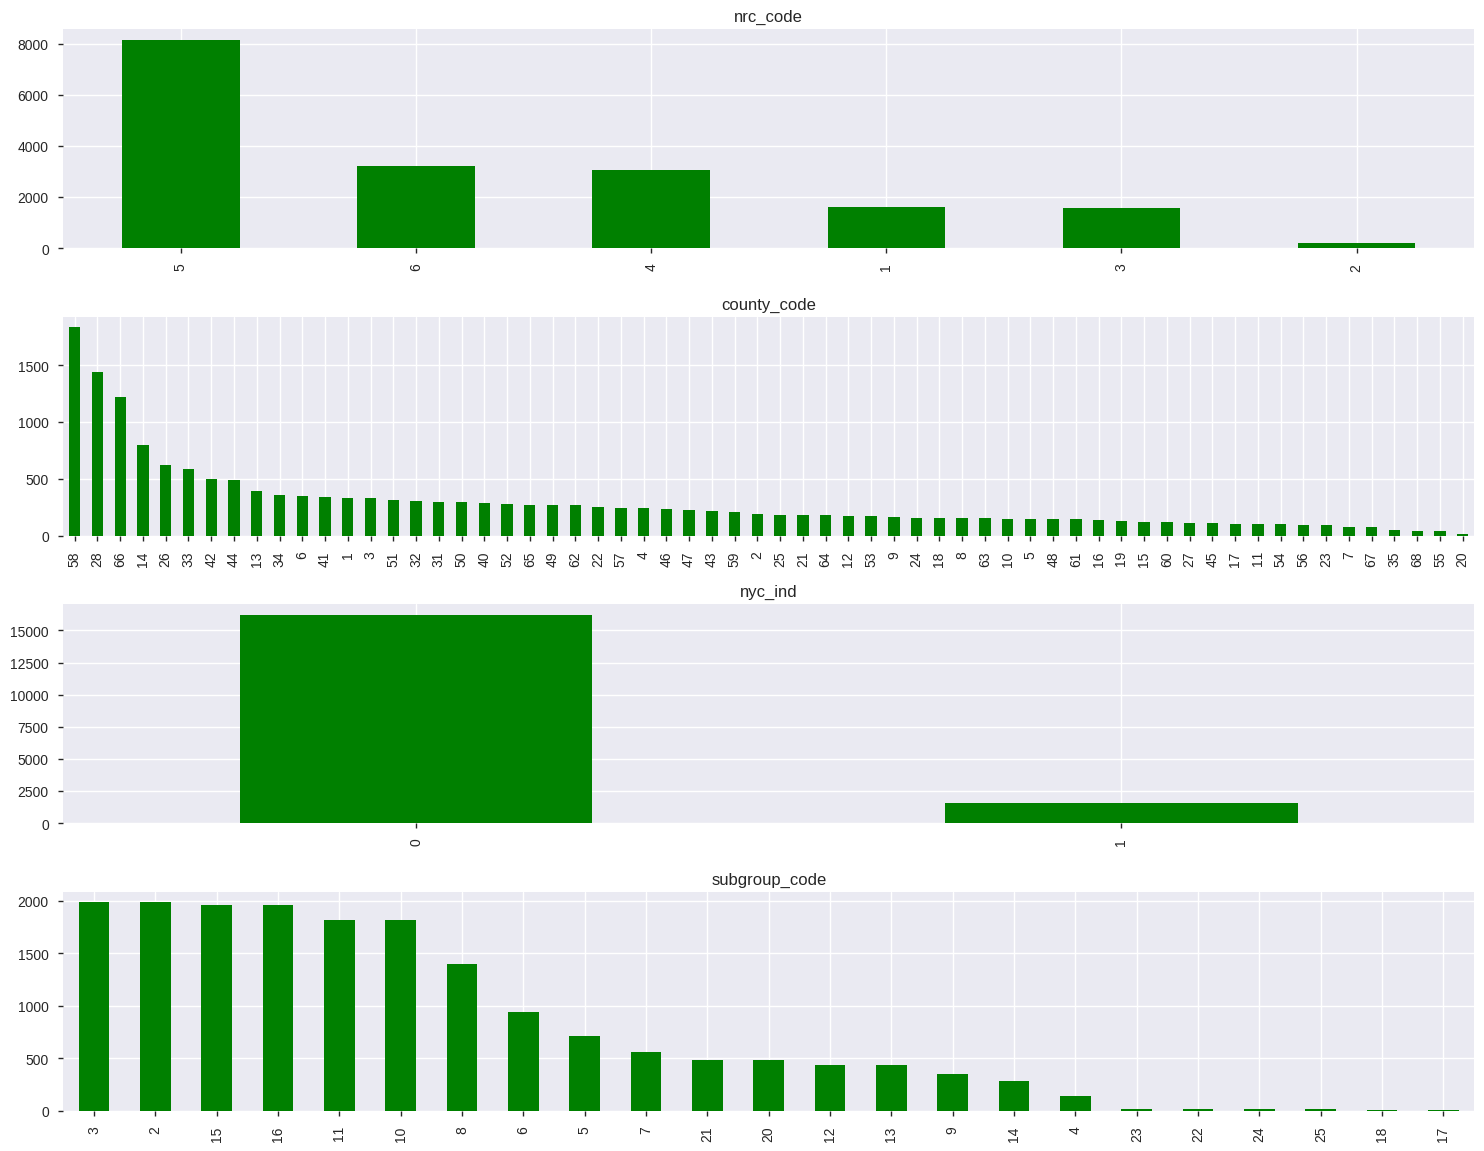

In [31]:
#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(7,1,j) 
    df[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) The most common observation for nrc_code is 5 which is Average Needs.<br>
2) The most common observation for county_code is 58 which is Suffolk. <br>
3) The most common observation for nyc_ind is 0 which means not in NYC.<br>
4) The most common observation for subgroup_code is 3 which is Male.<br>

We will now check the boxplots for outliers.

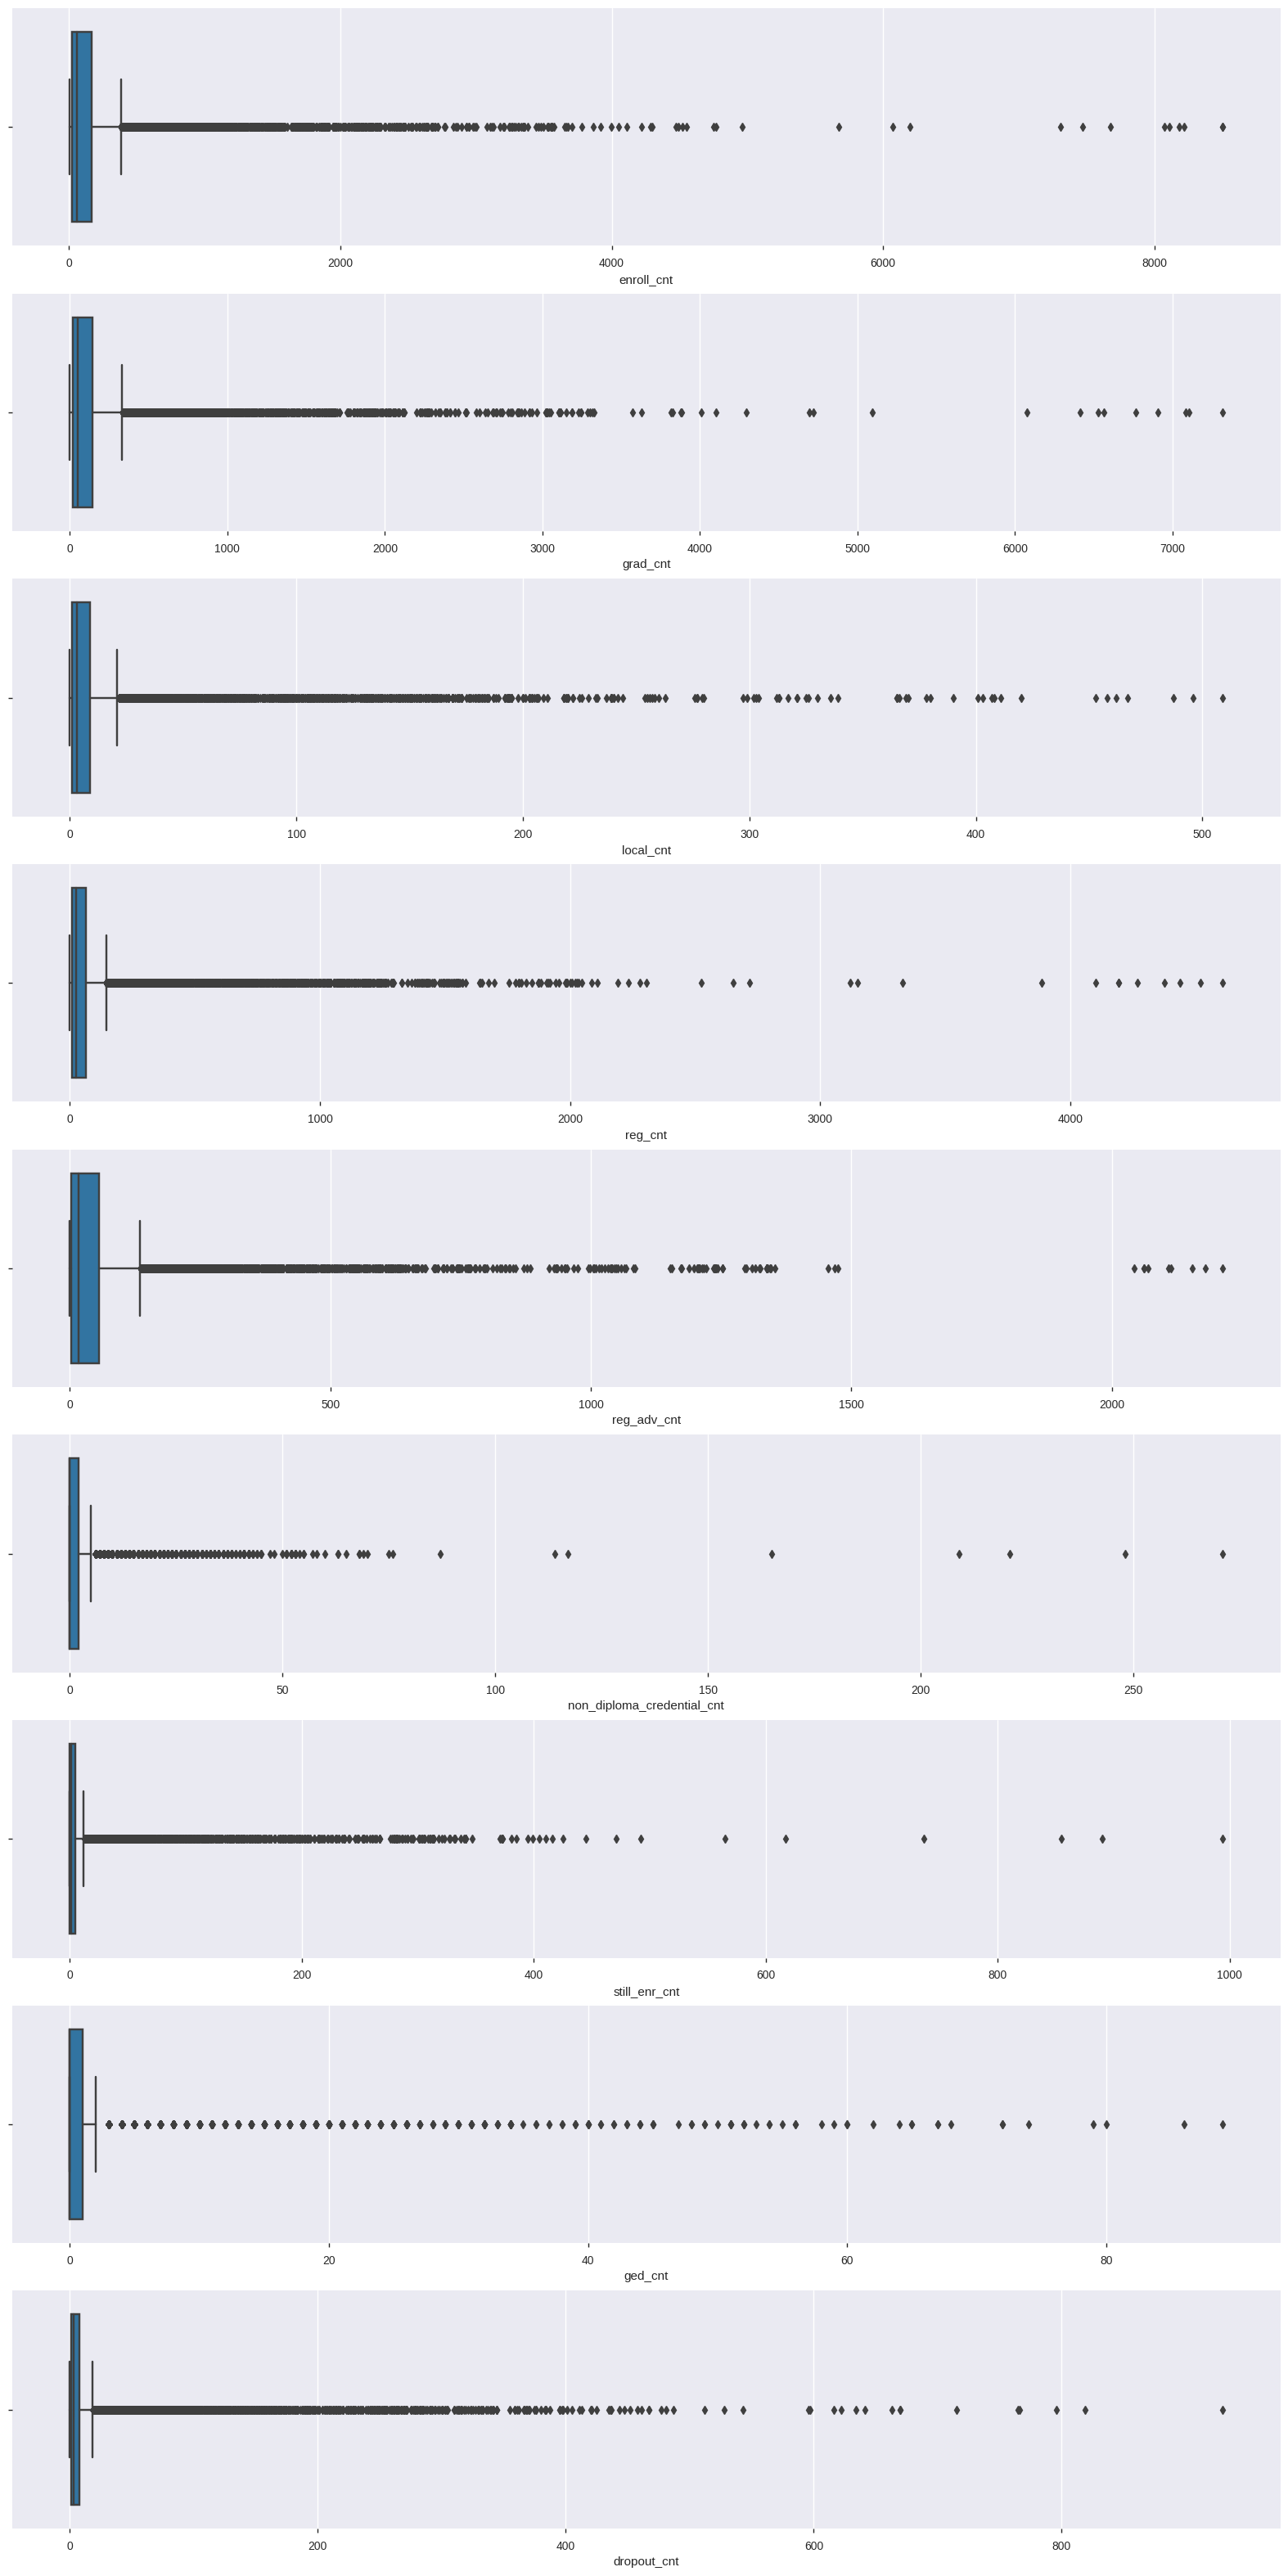

In [32]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,40))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(9,1,j) 
    sns.boxplot(x=k, data=df);
    j=j+1

#Show results    
plt.show()

We see that our data has a lot of outliers.  

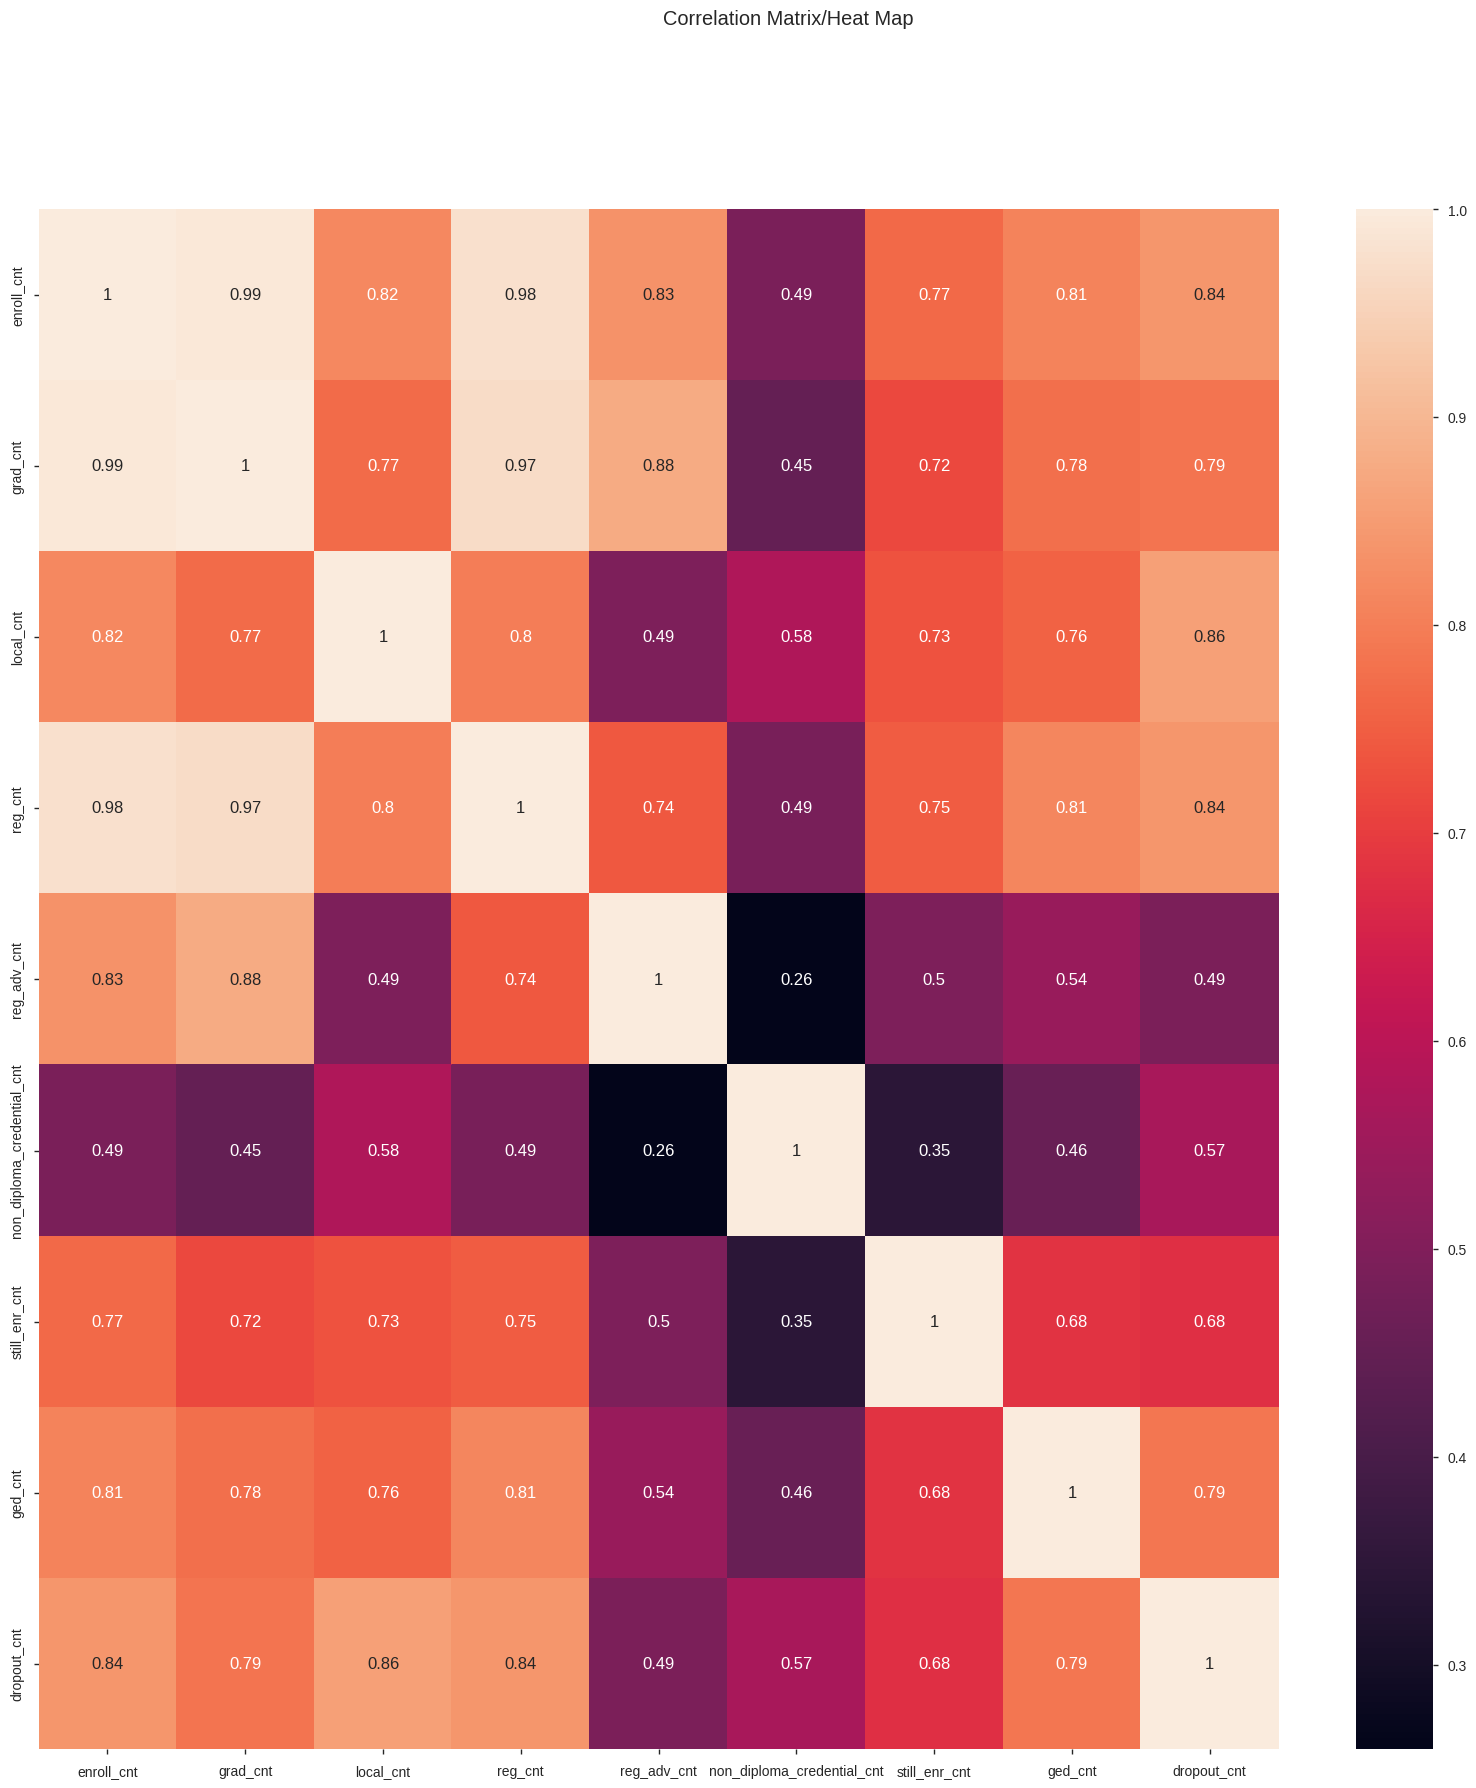

In [33]:
#Graph heat map for correlation
corr_num=df[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

Enroll_cnt is highly correlated with almost all of the variables except for non_diploma_credential_cnt.  Grad_cnt is highly correlated with local_cnt, reg_cnt and reg_adv_cnt.  We will drop enroll_cnt, local_cnt, reg_cnt, and reg_adv_cnt. 

In [34]:
#Drop grad_cnt
df2 = df[col_num].drop(df[col_num].columns[[0, 2, 3, 4]], axis=1)

#View the data frame to ensure that the column was removed
df2.head()

,grad_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
67,259.0,3.0,14.0,5.0,54.0
68,223.0,11.0,21.0,2.0,86.0
70,240.0,10.0,19.0,6.0,81.0
71,81.0,0.0,5.0,1.0,22.0
72,44.0,1.0,2.0,0.0,6.0


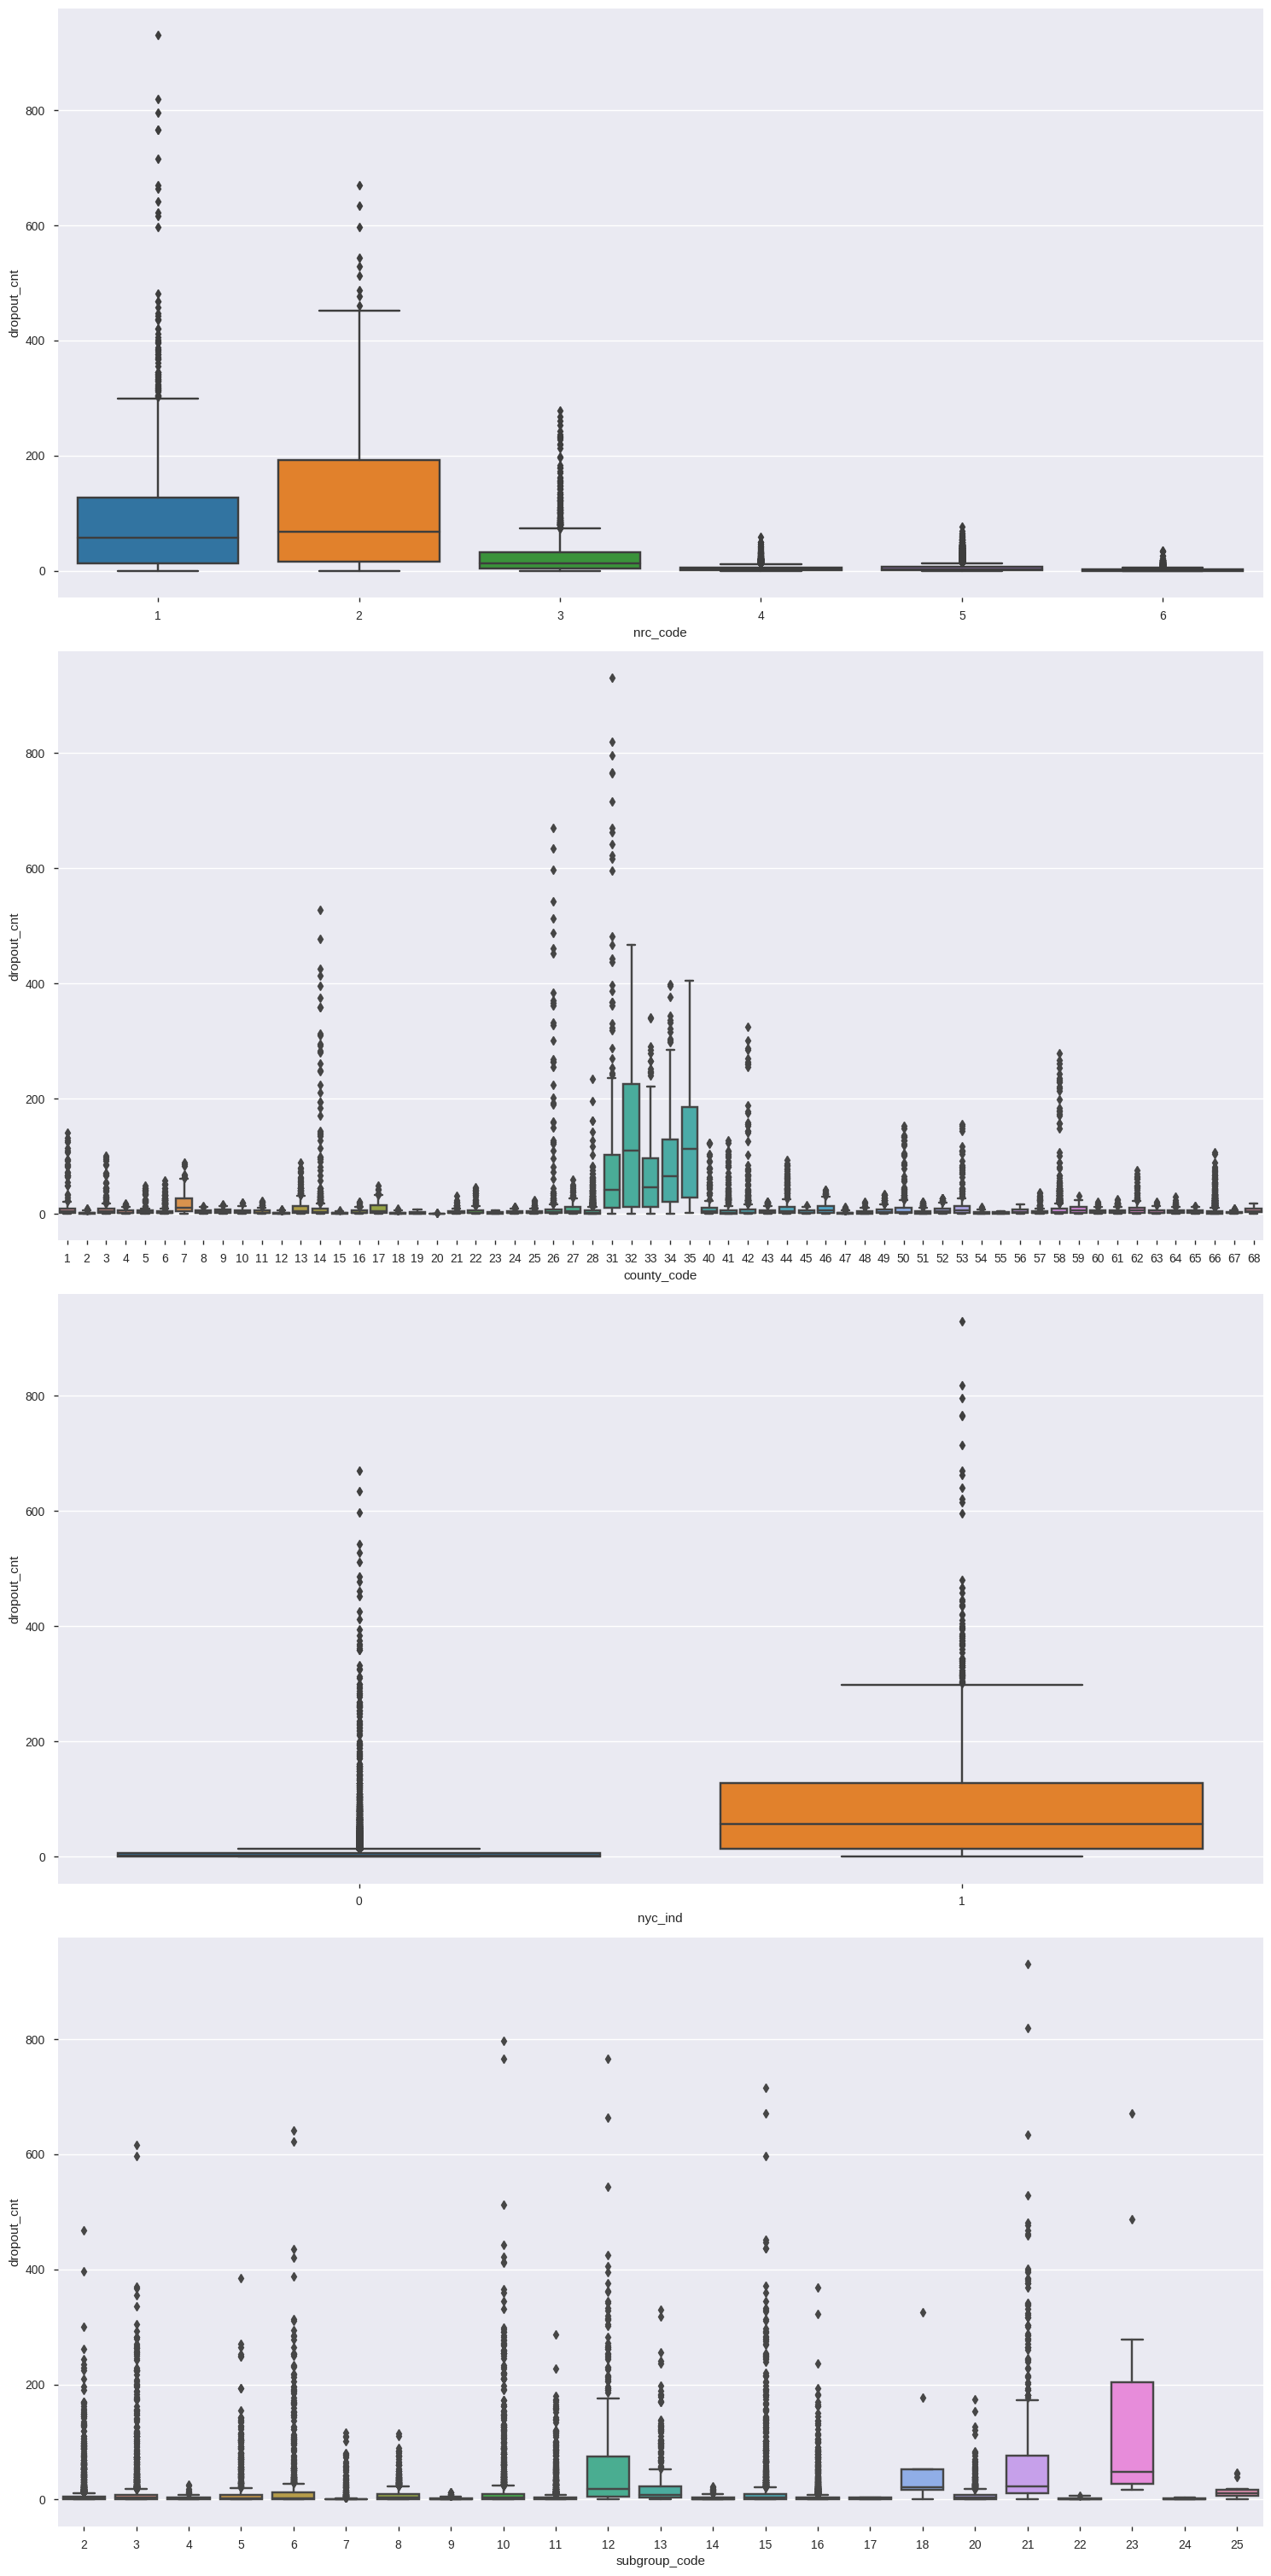

In [35]:
#Set plot parameters
plt.rcParams.update({'font.size': 10,'figure.figsize':(15,75)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical attribute
for k in df[col_cat].columns.to_list():    
    plt.subplot(10,1,j) 
    sns.boxplot(data=df, x=k, y='dropout_cnt')
    j=j+1

plt.tight_layout()

#Show results    
plt.show()

From the box plots we would expect all of these attributes are predictive. 

1) nrc_code 1, 2, 3, are more predictive than 4, 5, and 6.  1 is NYC, 2 is Buffalo Rochester Yonkers Syracuse, and 3 is Urban-Suburban High Needs.<br>
2) county_code 31, 32, 33, 34, and 35 are more predictive than the other counties.  31 is NYC, 32 is Bronx, 33 is Kings, 34 is Queens, and 35 is Richmond.<br>
3) nyc_ind of 1 is more predictive than 0.<br>
4) subgroup_code 12, 13, 18, 21, 23, and 35 are more predictive than the other subgroup_codes.  12 is Not English Language Learner, 13 is English Language Learner, 18 is Not Migrant, 21 is Not Homeless, 23 is Not in Foster Care, and 25 is Parent Not in Armed Forces.<br>

In [36]:
#Import stats module to perform chi-square
from scipy import stats

#Perform chi-square test
chi_sq=[]
for i in range(0,4):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(df2['dropout_cnt'], df[col_cat].iloc[:,i]))[0:2],i])
    
#Chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(29055.654845380588, 1.2979905599893134e-204), 1],
 [(16673.85587834699, 0.0), 3],
 [(16202.783039741287, 0.0), 0],
 [(7705.697769673643, 0.0), 2]]

The chi-square test tells us the following columns should be the most significant columns to include in our analysis:<br>
Column 1 - county_code <br>
Column 3 - subgroup_code <br>

Next, we will create dummy variables for our categorical variables, county_code and subgroup_code, so that they can be included in our models.

In [37]:
#Get dummies
categorical_dummy3=pd.get_dummies(df.county_code, drop_first= False)

#Rename columns
categorical_dummy3.columns = ['cc_1', 'cc_2', 'cc_3', 'cc_4','cc_5', 'cc_6', 'cc_7', 'cc_8', 'cc_9', 'cc_10', 'cc_11', 'cc_12',
                             'cc_13', 'cc_14', 'cc_15', 'cc_16', 'cc_17', 'cc_18', 'cc_19', 'cc_20', 'cc_21', 'cc_22',
                              'cc_23', 'cc_24', 'cc_25', 'cc_26', 'cc_27', 'cc_28', 'cc_31', 'cc_32','cc_33', 'cc_34', 
                              'cc_35', 'cc_40', 'cc_41', 'cc_42', 'cc_43', 'cc_44', 'cc_45', 'cc_46', 'cc_47', 'cc_48', 
                              'cc_49', 'cc_50', 'cc_51', 'cc_52', 'cc_53', 'cc_54', 'cc_55', 'cc_56', 'cc_57', 'cc_58', 
                              'cc_59', 'cc_60', 'cc_61', 'cc_62', 'cc_63', 'cc_64', 'cc_65', 'cc_66', 'cc_67', 'cc_68']

#Display first 5 rows
categorical_dummy3.head()

,cc_1,cc_2,cc_3,cc_4,cc_5,cc_6,cc_7,cc_8,cc_9,cc_10,cc_11,cc_12,cc_13,cc_14,cc_15,cc_16,cc_17,cc_18,cc_19,cc_20,cc_21,cc_22,cc_23,cc_24,cc_25,cc_26,cc_27,cc_28,cc_31,cc_32,cc_33,cc_34,cc_35,cc_40,cc_41,cc_42,cc_43,cc_44,cc_45,cc_46,cc_47,cc_48,cc_49,cc_50,cc_51,cc_52,cc_53,cc_54,cc_55,cc_56,cc_57,cc_58,cc_59,cc_60,cc_61,cc_62,cc_63,cc_64,cc_65,cc_66,cc_67,cc_68
67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#Get dummies
categorical_dummy4=pd.get_dummies(df.subgroup_code, drop_first= False)

#Rename columns
categorical_dummy4.columns = ['sb_2', 'sb_3', 'sb_4','sb_5', 'sb_6', 'sb_7', 'sb_8', 'sb_9', 'sb_10', 'sb_11', 'sb_12',
                              'sb_13', 'sb_14', 'sb_15', 'sb_16', 'sb_17', 'sb_18', 'sb_20', 'sb_21', 'sb_22', 'sb_23',
                              'sb_24', 'sb_25']

#Display first 5 rows
categorical_dummy4.head()

,sb_2,sb_3,sb_4,sb_5,sb_6,sb_7,sb_8,sb_9,sb_10,sb_11,sb_12,sb_13,sb_14,sb_15,sb_16,sb_17,sb_18,sb_20,sb_21,sb_22,sb_23,sb_24,sb_25
67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h3><b> Prepped Data Review</h3></b>

Combine the categorical data

In [39]:
#Concatenate the data frame with the dummies
df3 = pd.concat([df[col_cat], categorical_dummy3, categorical_dummy4], axis=1)

#Drop the columns that were converted to dummies.  We will also drop nrc_code and nyc_ind since they were not selected by 
#our chi-square test.
df3 = df3.drop(['county_code', 'subgroup_code', 'nrc_code', 'nyc_ind'], axis=1)

#Check results
df3.head()

,cc_1,cc_2,cc_3,cc_4,cc_5,cc_6,cc_7,cc_8,cc_9,cc_10,cc_11,cc_12,cc_13,cc_14,cc_15,cc_16,cc_17,cc_18,cc_19,cc_20,cc_21,cc_22,cc_23,cc_24,cc_25,cc_26,cc_27,cc_28,cc_31,cc_32,cc_33,cc_34,cc_35,cc_40,cc_41,cc_42,cc_43,cc_44,cc_45,cc_46,...,cc_52,cc_53,cc_54,cc_55,cc_56,cc_57,cc_58,cc_59,cc_60,cc_61,cc_62,cc_63,cc_64,cc_65,cc_66,cc_67,cc_68,sb_2,sb_3,sb_4,sb_5,sb_6,sb_7,sb_8,sb_9,sb_10,sb_11,sb_12,sb_13,sb_14,sb_15,sb_16,sb_17,sb_18,sb_20,sb_21,sb_22,sb_23,sb_24,sb_25
67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


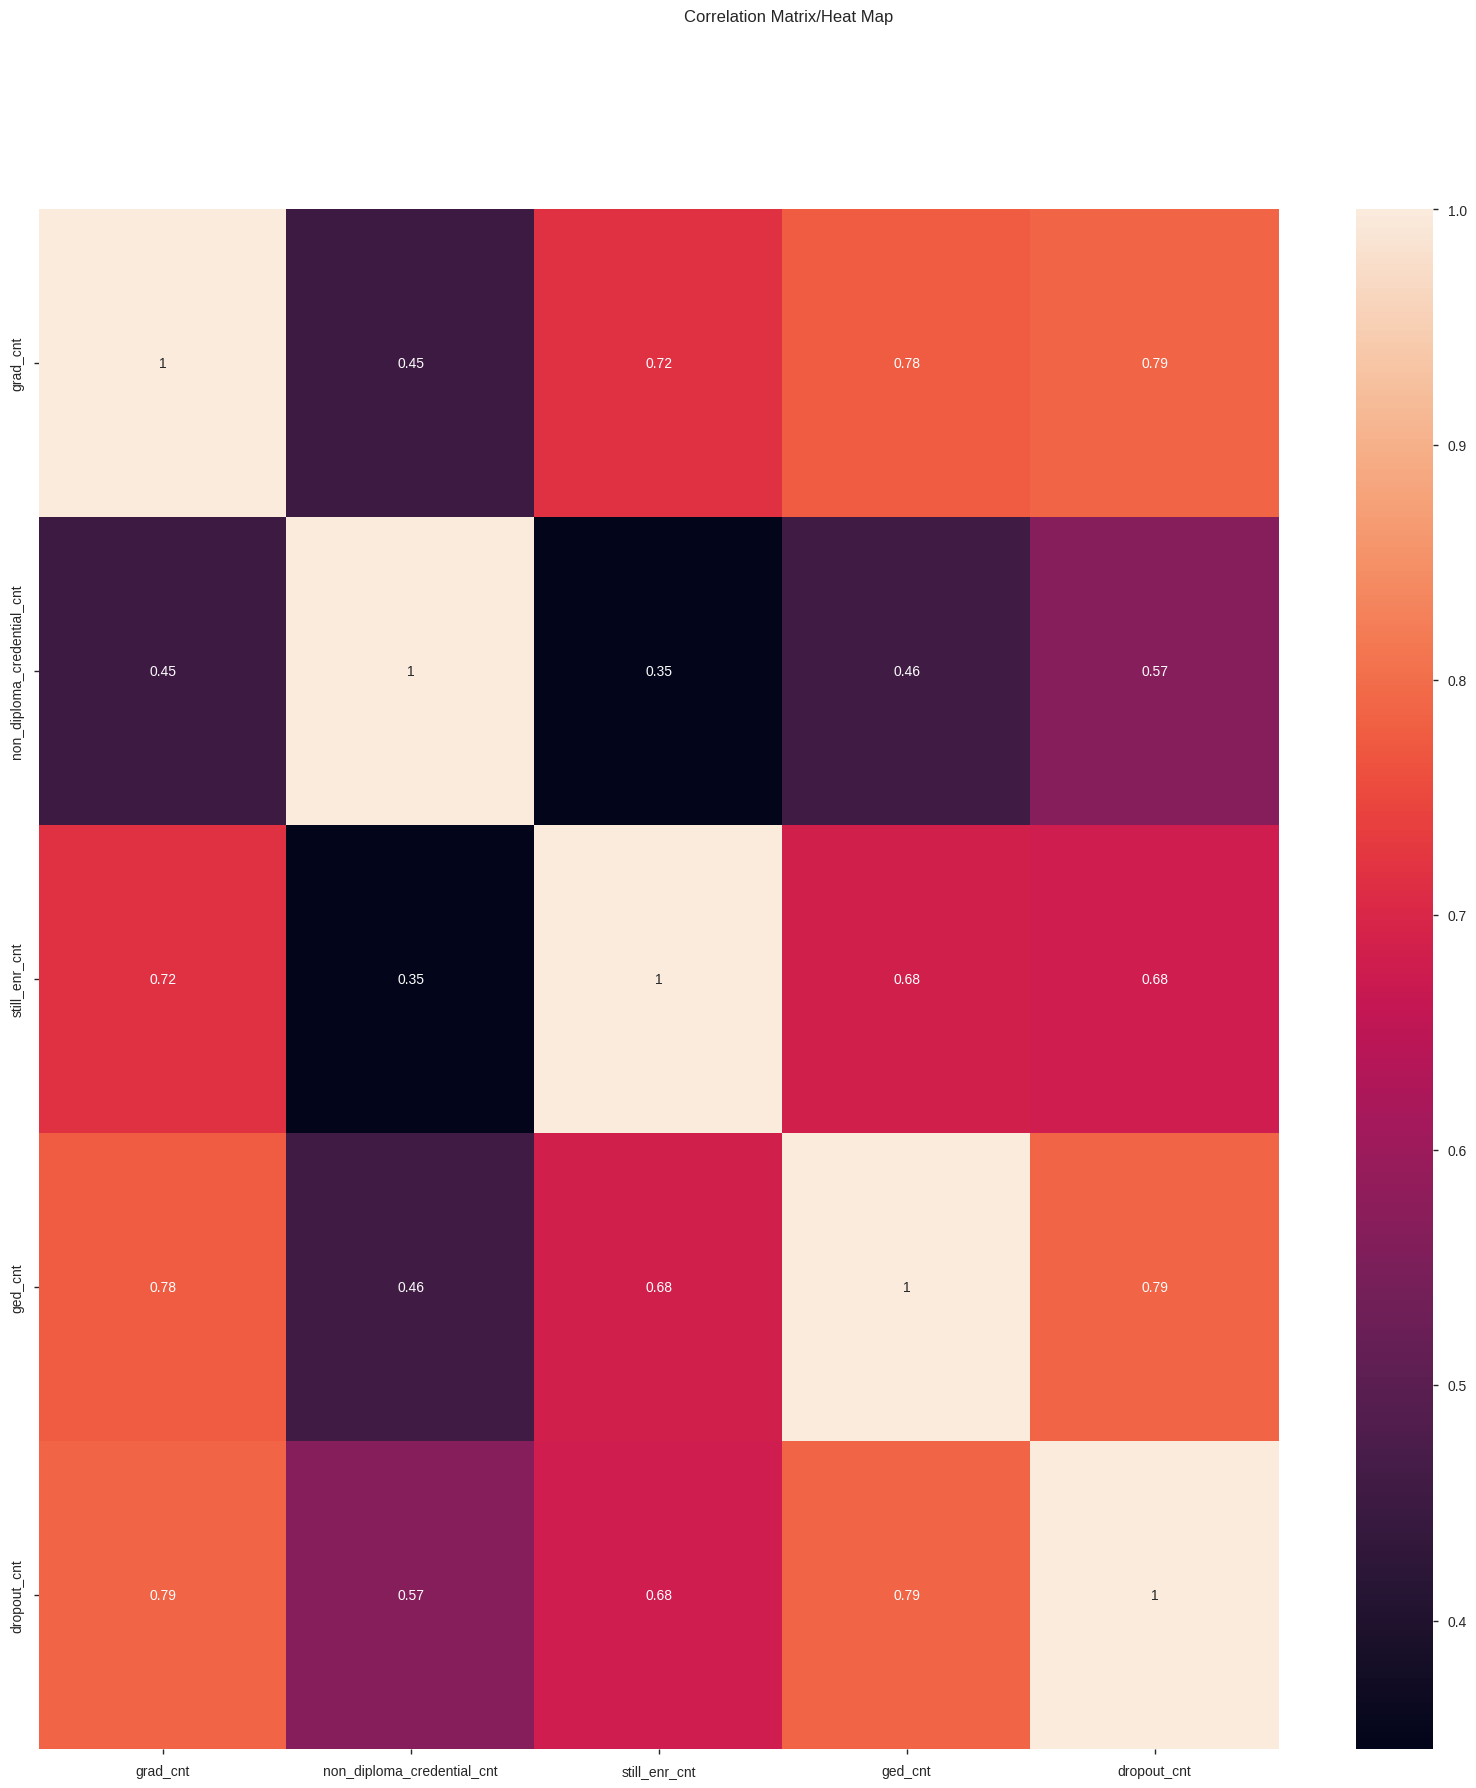

In [40]:
#Graph new heat map for correlation
corr_num=df2.corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

The numerical attributes that are most predictive of dropout_cnt are grad_cnt and ged_cnt.

<h3><b>Regression Modeling</b></h3>

<h4><b>Multiple Linear Regression</b></h4>

In [42]:
#Split the data
y = df2['dropout_cnt']
X = df2.drop(['dropout_cnt'], axis = 1)

#Create a data frame with all numeric variables and the categorical variables
explanatory = pd.concat([X, df3], axis = 1)
explanatory = explanatory.reindex(X.index)

#Import train_test_split from sci-kit learn
from sklearn.model_selection import train_test_split

#Split the data into training and testing subsets. 
#Set aside 33% of the data for testing purposes; specify a value for the inital random_state to have the ability to 
#reproduce the exact same training and testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(explanatory, y, test_size=0.33, random_state=12)

<b>Model 1 - All Variables</b>

In [43]:
#Importing LinearRegression
from sklearn.linear_model import LinearRegression

#Create linear regression #2
reg1 = LinearRegression().fit(X_train,y_train)

In [44]:
y_pred = reg1.predict(X_test)
y_pred

array([83.70923898,  1.64384896,  0.55350766, ..., -6.49205394,
        1.05958915,  1.26794983])

In [45]:
#Importing r2_score and mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Predicting the accuracy score
score=r2_score(y_test,y_pred)

print('r2 score is =',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is = 0.7410408650316438
mean_sqrd_error is = 545.3031785765058
root_mean_squared error of is = 23.351727528739836


Model 1 included all variables of our cleaned-up data set.  The R^2 is 74.1% which means that 74.1% of the observed variation can be explained by the model's inputs.

Text(0.5, 1.0, 'Actual vs Predicted')

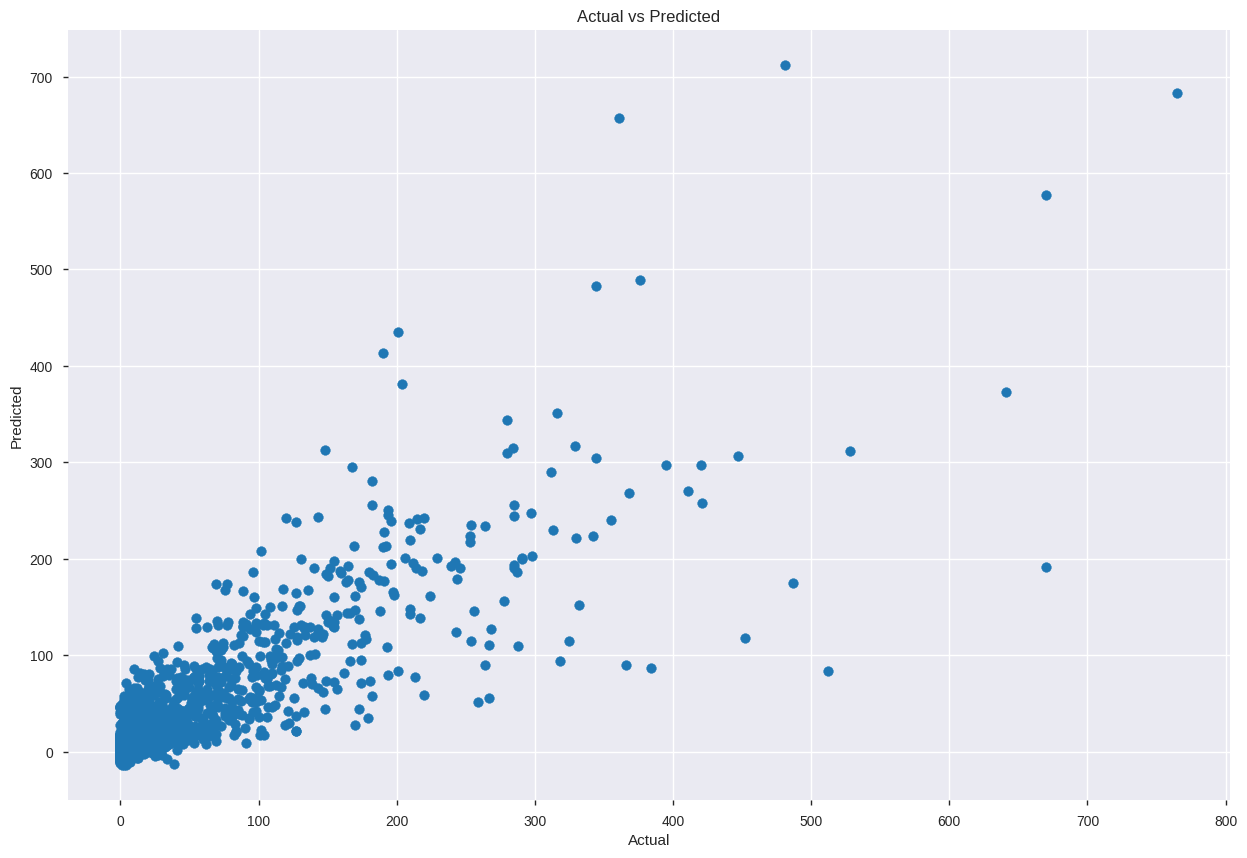

In [46]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

<b>Model 1 K-Fold Cross Validation</b><br>
We must use data that has been split into training and testing subsets as we did above. K is often set to a value of 5 or 10 since these values have been shown to produce testing error rate estimates that exhibit neither high bias nor very high variance (see "An Introduction to Statistical Learning", page 184, James, Witten, Hastie, and Tibshirani, ISBN-13: 978-1461471370).  I will use 10 for my k-fold cross validation testing.  

In [47]:
#load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

lg1 = LinearRegression()

#Fit the model using 5-fold cross validation
scores = cross_val_score(lg1, X_train, y_train, cv=10)

#Print the R^2 metrics derived from the K-fold cross validation of our linear regression model
print(scores)

[0.74956089 0.8087201  0.77400543 0.78911424 0.73870056 0.70275648
 0.75386669 0.80015688 0.85028761 0.77123868]


In [48]:
#Calculate the average R^2 across all 10 folds
np.mean(scores)

0.7738407552861285

Our 10-fold cross validation shows that our model has a cross validated R^2 of 77.3%

<b>Model 2<b>

Since grad_cnt and ged_cnt were the variables most strongly correlated with dropout_cnt, I will include those in model 2. I will also include the county_codes and the subgroup_codes where we saw the highest dropout_cnt on the boxplots.

In [49]:
#Use 'grad_cnt', 'ged_cnt', 'cc_31', 'cc_32','cc_33', 'cc_34', 'cc_35', 'sb_12','sb_13', 'sb_18', 'sb_21', and 'sb_23' 
#as explanatory variables
X_train2 = X_train[['grad_cnt', 'ged_cnt', 'cc_31', 'cc_32','cc_33', 'cc_34', 'cc_35', 'sb_12','sb_13', 'sb_18', 'sb_21', 
                    'sb_23']]
X_test2 = X_test[['grad_cnt', 'ged_cnt', 'cc_31', 'cc_32','cc_33', 'cc_34', 'cc_35', 'sb_12','sb_13', 'sb_18', 'sb_21', 
                  'sb_23']]

In [50]:
#Create linear regression #2
reg2 = LinearRegression().fit(X_train2,y_train)

In [51]:
y_pred2 = reg2.predict(X_test2)
y_pred2

array([102.58336492,   1.11186707,  -0.80933644, ...,  -0.75283045,
         7.38403147,   0.2077713 ])

In [52]:
#Calculate R^2, the intercept, and the slope coefficients
score2 = r2_score(y_test, y_pred2)

print('r2 score is =',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_pred2))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_pred2)))

r2 score is = 0.7410408650316438
mean_sqrd_error is = 627.3830393041267
root_mean_squared error of is = 25.04761544147719


Model 2 included 12 variables from our data set.  The R^2 is 74.1% which means that 74.1% of the observed variation can be explained by the model's inputs.

Text(0.5, 1.0, 'Actual vs Predicted')

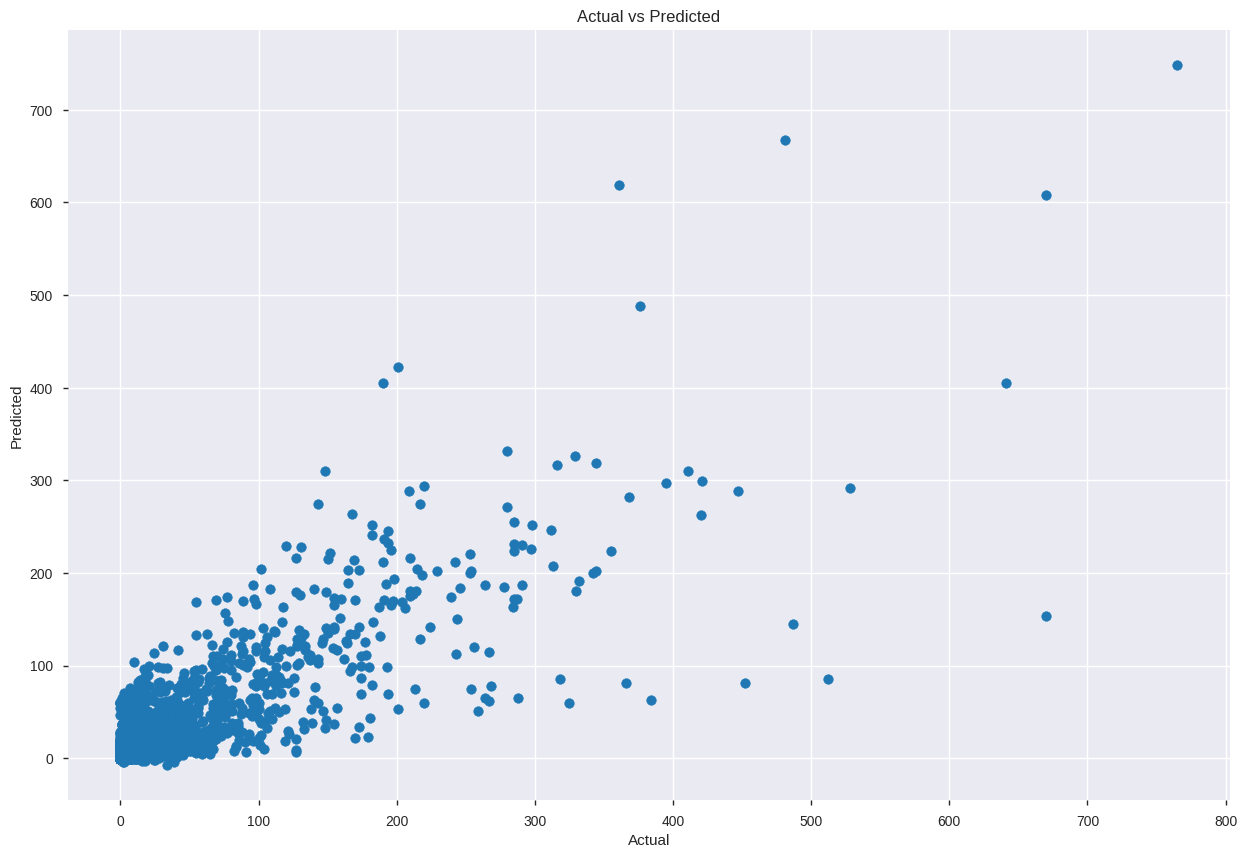

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

<b>K-Fold Cross Validation for Model 2</b>

In [54]:
#Assign the model function you want to use to a variable
lg2 = LinearRegression()

#Fit the model using 10-fold cross validation
scores = cross_val_score(lg2, X_train2, y_train, cv=10)

#Print the R^2 metrics derived from the K-fold cross validation of our linear regression model
print(scores)

[0.72865618 0.81618796 0.74900991 0.71067684 0.69767886 0.62122145
 0.71192247 0.76711886 0.834151   0.71775796]


In [55]:
#Calculate the average R^2 across all 10 folds
np.mean(scores)

0.7354381484675941

Our 10-fold cross validation shows that our model has a cross validated R^2 of 73.5%

<h3><b>Negative Binomial Regression</b></h3>

In [66]:
#Create the training and testing data sets.
nb_data = pd.concat([df2, df3], axis = 1)
nb_data = nb_data.reindex(X.index)

mask = np.random.rand(len(nb_data)) < 0.8
nb_train = nb_data[mask]
nb_test = nb_data[~mask]
print('Training data set length='+str(len(nb_train)))
print('Testing data set length='+str(len(nb_test)))

Training data set length=14256
Testing data set length=3558


<b> Model 1 </b>

In [67]:
#Setup the regression expression in patsy notation. We are telling patsy that dropout_cnt is our dependent variable and
#it depends on the regression variables: grad_cnt + ged_cnt + C(cc_31), C(cc_32), C(cc_33), C(cc_34), C(cc_35), C(sb_12), 
#C(sb_13), C(sb_18), C(sb_21), and C(sb_23).
expr = """dropout_cnt ~ grad_cnt + ged_cnt + C(cc_31) + C(cc_32) + C(cc_33) + C(cc_34) + C(cc_35) + C(sb_12) + C(sb_13) + 
                        C(sb_18) + C(sb_21) + C(sb_23)"""

In [68]:
#Set up the X and y matrices
from patsy import dmatrices
y_trainnb, X_trainnb = dmatrices(expr, nb_train, return_type = 'dataframe')
y_testnb, X_testnb = dmatrices(expr, nb_test, return_type = 'dataframe')

In [69]:
#Using the statsmodels GLM class, train the NegativeBinomial regression model on the training data set.
import statsmodels.api as sm
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt

nb_training_results = sm.GLM(y_trainnb, X_trainnb, family = sm.families.NegativeBinomial(alpha = 1)).fit()

#Print the training summary
print(nb_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                14256
Model:                            GLM   Df Residuals:                    14243
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42343.
Date:                Mon, 25 Oct 2021   Deviance:                       20875.
Time:                        03:37:23   Pearson chi2:                 2.89e+04
No. Iterations:                    49                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2588      0.010    121.206

In [70]:
#Make some predictions on the test data set.
nb_predicitions = nb_training_results.get_prediction(X_testnb)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = nb_predicitions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
73      4.633593  0.047194       4.542010       4.727021
75     17.204385  0.278810      16.666515      17.759613
80      8.937008  0.114750       8.714908       9.164769
90      9.298041  0.138014       9.031435       9.572517
98      4.321697  0.045045       4.234305       4.410892
...          ...       ...            ...            ...
73008   4.547937  0.046109       4.458458       4.639212
73032   3.980456  0.040044       3.902740       4.059720
73043   4.874307  0.050476       4.776374       4.974248
73129   3.674548  0.037593       3.601602       3.748972
73137   3.713936  0.037877       3.640436       3.788921

[3558 rows x 4 columns]


In [71]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_testnb['dropout_cnt']

In [72]:
r2_score(y_testnb, predicted_counts)

-464270099515468.2

The R^2 is 0 which means that none of the observed variation can be explained by the model's inputs.

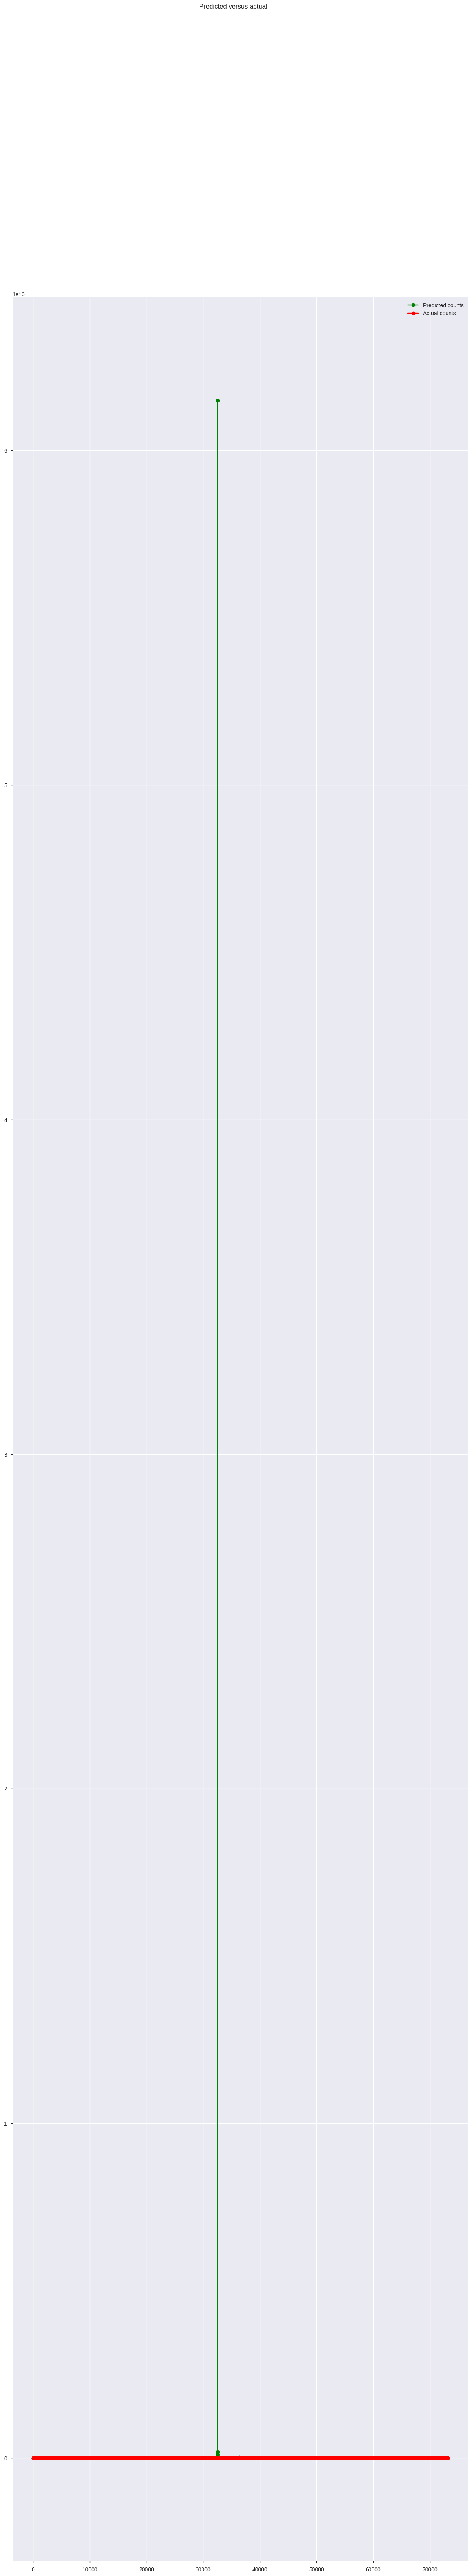

In [73]:
#Plot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual')
predicted, = plt.plot(X_testnb.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_testnb.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 1500x7500 with 0 Axes>

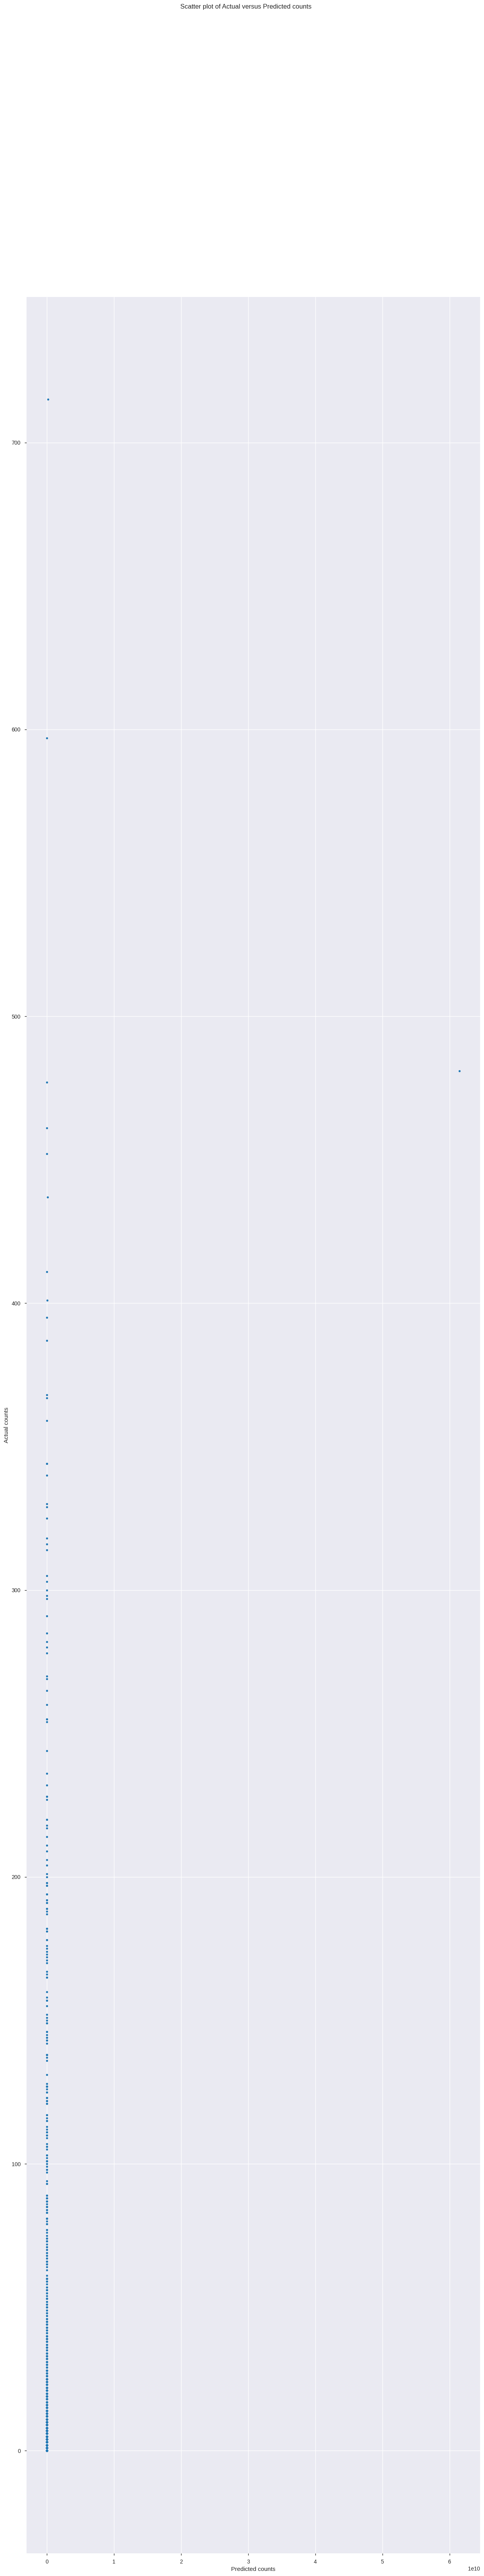

In [74]:
#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

<b>Model 2</b>

In [75]:
#Setup the regression expression in patsy notation. We are telling patsy that dropout_cnt is our dependent variable and
#it depends on the regression variables: grad_cnt + ged_cnt + C(sb_12) + C(sb_13) + C(sb_14) + C(sb_15) + C(sb_16).
expr2 = """dropout_cnt ~ grad_cnt + ged_cnt + C(sb_12) + C(sb_13) + C(sb_14) + C(sb_15) + C(sb_16)"""

In [76]:
#Set up the X and y matrices
from patsy import dmatrices
y_trainnb2, X_trainnb2 = dmatrices(expr, nb_train, return_type = 'dataframe')
y_testnb2, X_testnb2 = dmatrices(expr, nb_test, return_type = 'dataframe')

In [77]:
#Using the statsmodels GLM class, train the NegativeBinomial regression model on the training data set.
import statsmodels.api as sm
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt

nb_training_results2 = sm.GLM(y_trainnb2, X_trainnb2, family = sm.families.NegativeBinomial(alpha = 1)).fit()

#Print the training summary
print(nb_training_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                14256
Model:                            GLM   Df Residuals:                    14243
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42343.
Date:                Mon, 25 Oct 2021   Deviance:                       20875.
Time:                        03:37:49   Pearson chi2:                 2.89e+04
No. Iterations:                    49                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2588      0.010    121.206

In [78]:
#Make some predictions on the test data set.
nb_predicitions2 = nb_training_results2.get_prediction(X_testnb)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame2 = nb_predicitions2.summary_frame()
print(predictions_summary_frame2)

            mean   mean_se  mean_ci_lower  mean_ci_upper
73      4.633593  0.047194       4.542010       4.727021
75     17.204385  0.278810      16.666515      17.759613
80      8.937008  0.114750       8.714908       9.164769
90      9.298041  0.138014       9.031435       9.572517
98      4.321697  0.045045       4.234305       4.410892
...          ...       ...            ...            ...
73008   4.547937  0.046109       4.458458       4.639212
73032   3.980456  0.040044       3.902740       4.059720
73043   4.874307  0.050476       4.776374       4.974248
73129   3.674548  0.037593       3.601602       3.748972
73137   3.713936  0.037877       3.640436       3.788921

[3558 rows x 4 columns]


In [79]:
predicted_counts2 = predictions_summary_frame2['mean']
actual_counts2 = y_testnb2['dropout_cnt']

In [80]:
r2_score(y_testnb2, predicted_counts2)

-464270099515468.2

The R^2 is 0 which means that none of the observed variation can be explained by the model's inputs.

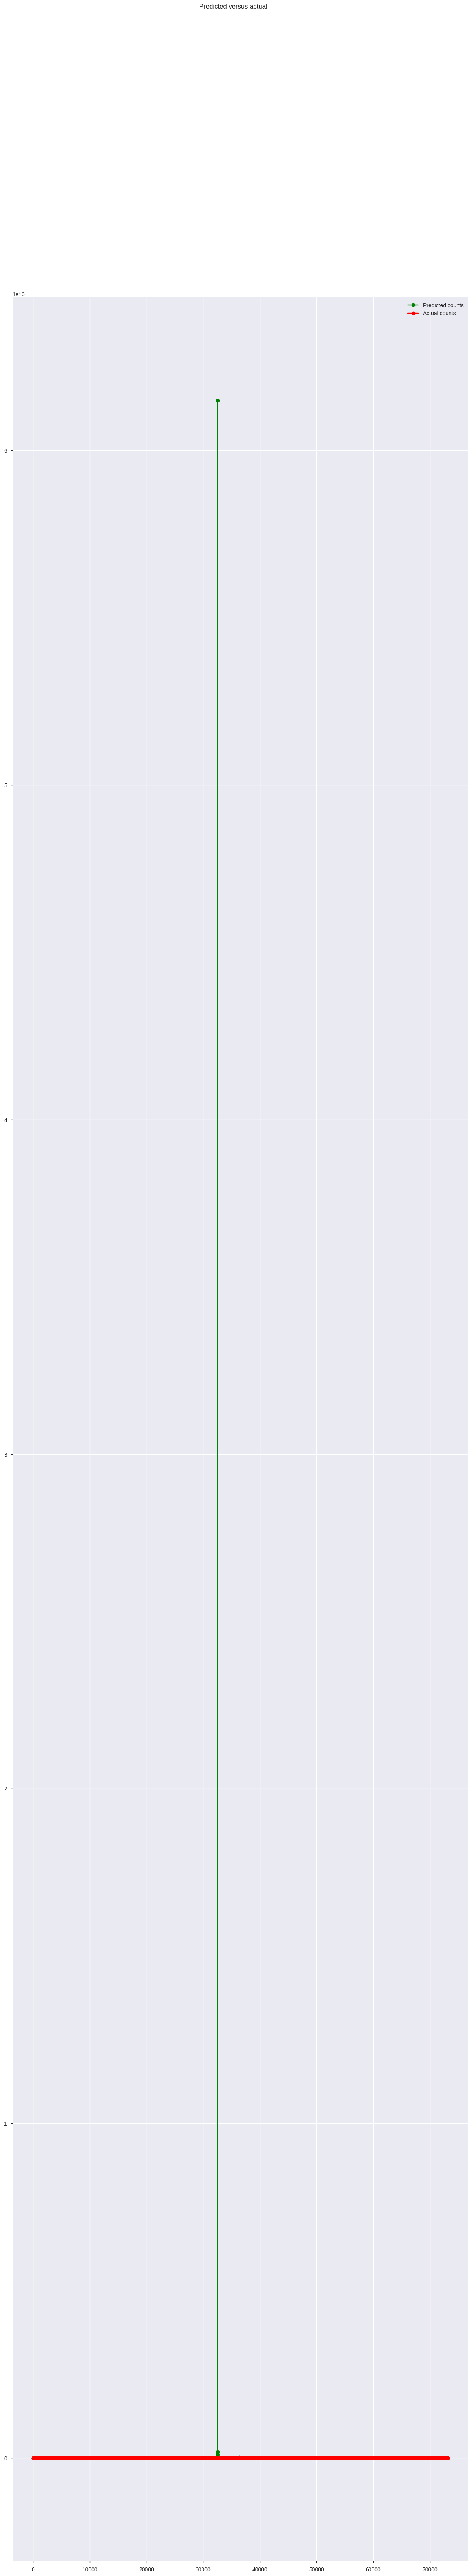

In [81]:
#Plot the predicted counts versus the actual counts for the test data.
fig2 = plt.figure()
fig2.suptitle('Predicted versus actual')
predicted2, = plt.plot(X_testnb2.index, predicted_counts2, 'go-', label='Predicted counts')
actual2, = plt.plot(X_testnb2.index, actual_counts2, 'ro-', label='Actual counts')
plt.legend(handles=[predicted2, actual2])
plt.show()

<Figure size 1500x7500 with 0 Axes>

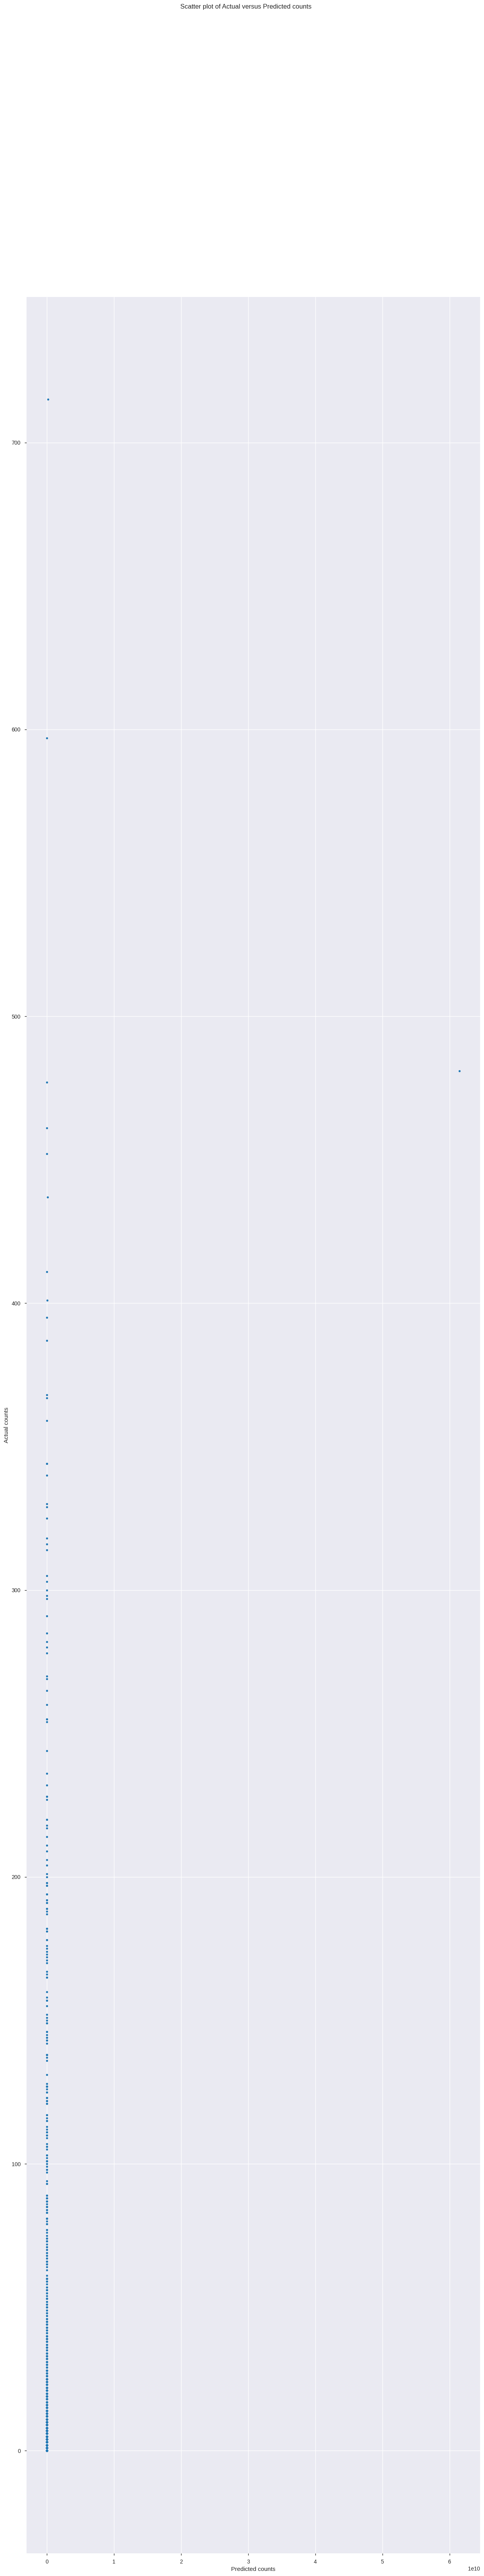

In [82]:
#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig2 = plt.figure()
fig2.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts2, y=actual_counts2, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

<b>Poisson Model</b>

<b>Model 1</b>

In [89]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [90]:
#printing summary page
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                11935
Model:                            GLM   Df Residuals:                    11847
Model Family:                 Poisson   Df Model:                           87
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0310e+05
Date:                Mon, 25 Oct 2021   Deviance:                   1.7240e+05
Time:                        03:38:19   Pearson chi2:                 2.83e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
grad_cnt            

In [91]:
poisson_predictions = poisson_training_results.get_prediction(X_test)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
35901  16.100653  0.442616      15.256098      16.991961
41486   5.814971  0.226525       5.387517       6.276341
22764   1.356778  0.090933       1.189762       1.547240
65506   3.105599  0.173326       2.783806       3.464589
35184  49.137142  0.552130      48.066818      50.231300
...          ...       ...            ...            ...
10367   5.797425  0.344010       5.160909       6.512446
50078   3.614867  0.147556       3.336929       3.915954
68034   1.264992  0.038340       1.192035       1.342413
31316   8.898326  0.126667       8.653496       9.150084
39479   9.812106  0.169536       9.485385      10.150081

[5879 rows x 4 columns]


<Figure size 1500x7500 with 0 Axes>

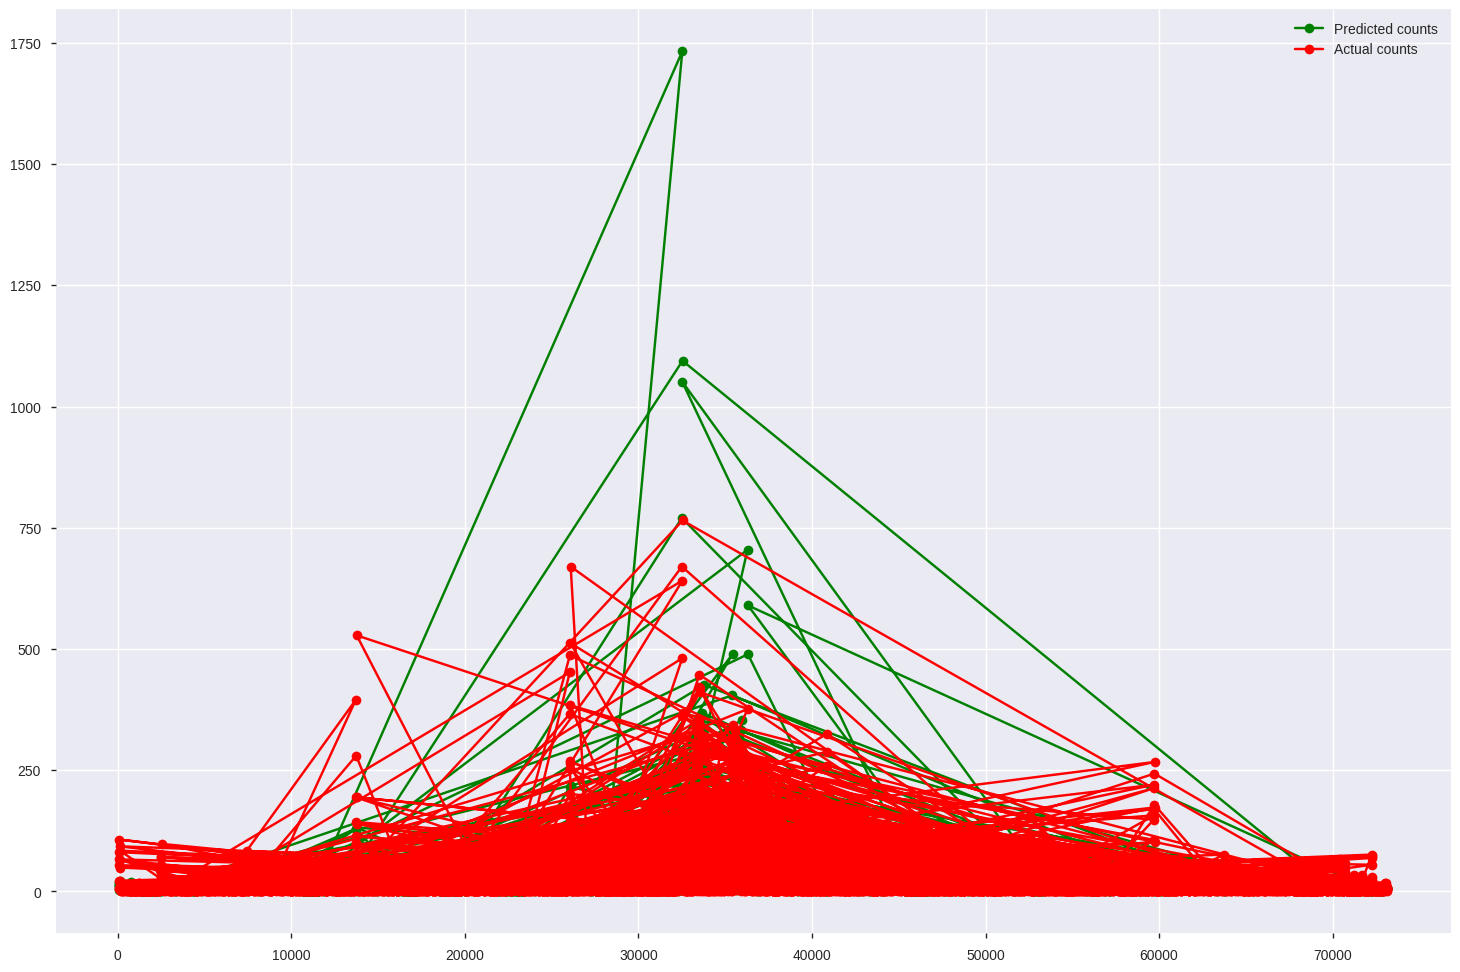

In [92]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test

fig = plt.figure()
plt.figure(figsize=(18,12))
fig.suptitle('Predicted versus actual dropout counts')

predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')

plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 1500x7500 with 0 Axes>

<Figure size 1500x7500 with 0 Axes>

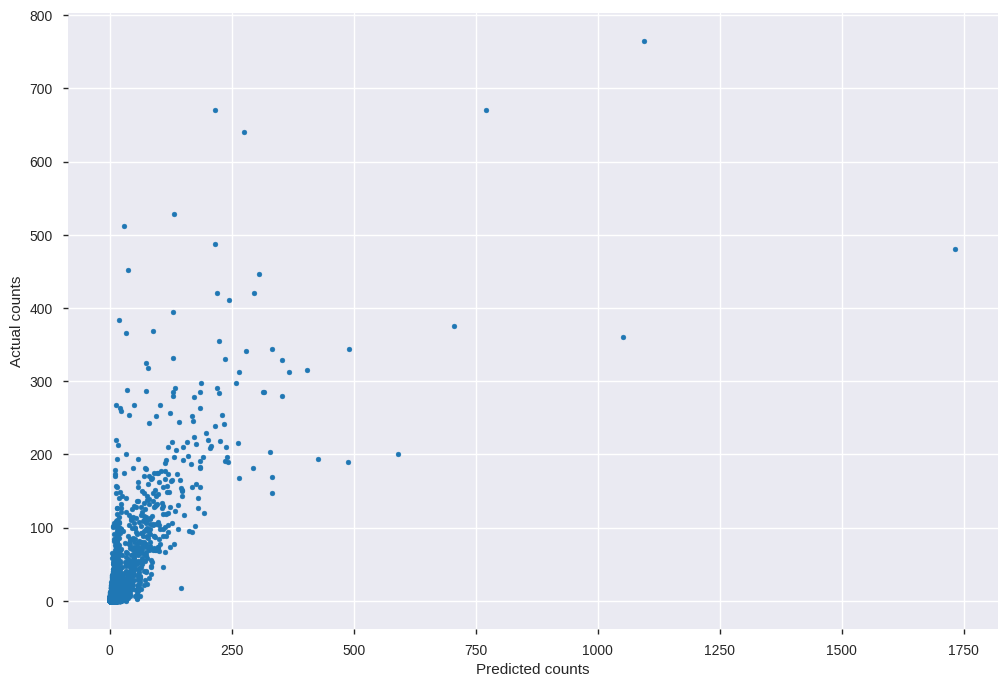

In [93]:
#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
plt.figure(figsize=(12,8))
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [88]:
y.describe()

count    17814.000000
mean        15.311890
std         46.678858
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        930.000000
Name: dropout_cnt, dtype: float64

In [58]:
y.value_counts()

0.0      3609
1.0      2899
2.0      1964
3.0      1480
4.0      1128
         ... 
213.0       1
380.0       1
819.0       1
371.0       1
339.0       1
Name: dropout_cnt, Length: 362, dtype: int64

Most of our values are indeed zero for our explanatory variable.  Let's try zero inflated Poisson Regression.
Source: https://towardsdatascience.com/an-illustrated-guide-to-the-zero-inflated-poisson-model-b22833343057

<b>Model 2</b>

In [94]:
#zero-inflated poisson training model
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 58.939986
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [95]:
#Printing the summary of the model
print(zip_training_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             dropout_cnt   No. Observations:                11935
Model:             ZeroInflatedPoisson   Df Residuals:                    11847
Method:                            MLE   Df Model:                           87
Date:                 Mon, 25 Oct 2021   Pseudo R-squ.:                  -1.605
Time:                         03:38:47   Log-Likelihood:            -7.0345e+05
converged:                       False   LL-Null:                   -2.7006e+05
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
inflate_grad_cnt                       0.1000        nan        nan        nan         nan         nan
inflate_non_diploma_credential_cnt     0.1000      

In [96]:
zip_predictions = zip_training_results.predict(X_test,exog_infl=X_test)

predicted_counts=np.round(zip_predictions)

actual_counts=y_test

print('ZIP RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts,actual_counts),2)))))

ZIP RMSE=3711.264878717228


In [97]:
zip_predictions.head(5)

35901    0.000000e+00
41486    1.815789e-02
22764    2.692105e-01
65506    7.625748e-02
35184    3.544921e-09
dtype: float64

In [98]:
predicted_counts.head(15)

35901    0.0
41486    0.0
22764    0.0
65506    0.0
35184    0.0
56169    0.0
39600    0.0
22364    0.0
40799    0.0
19065    0.0
30970    0.0
65430    0.0
32367    0.0
58182    0.0
33400    0.0
dtype: float64

In [99]:
actual_counts.head(5)

35901    66.0
41486     4.0
22764     4.0
65506     3.0
35184    60.0
Name: dropout_cnt, dtype: float64

<Figure size 1500x7500 with 0 Axes>

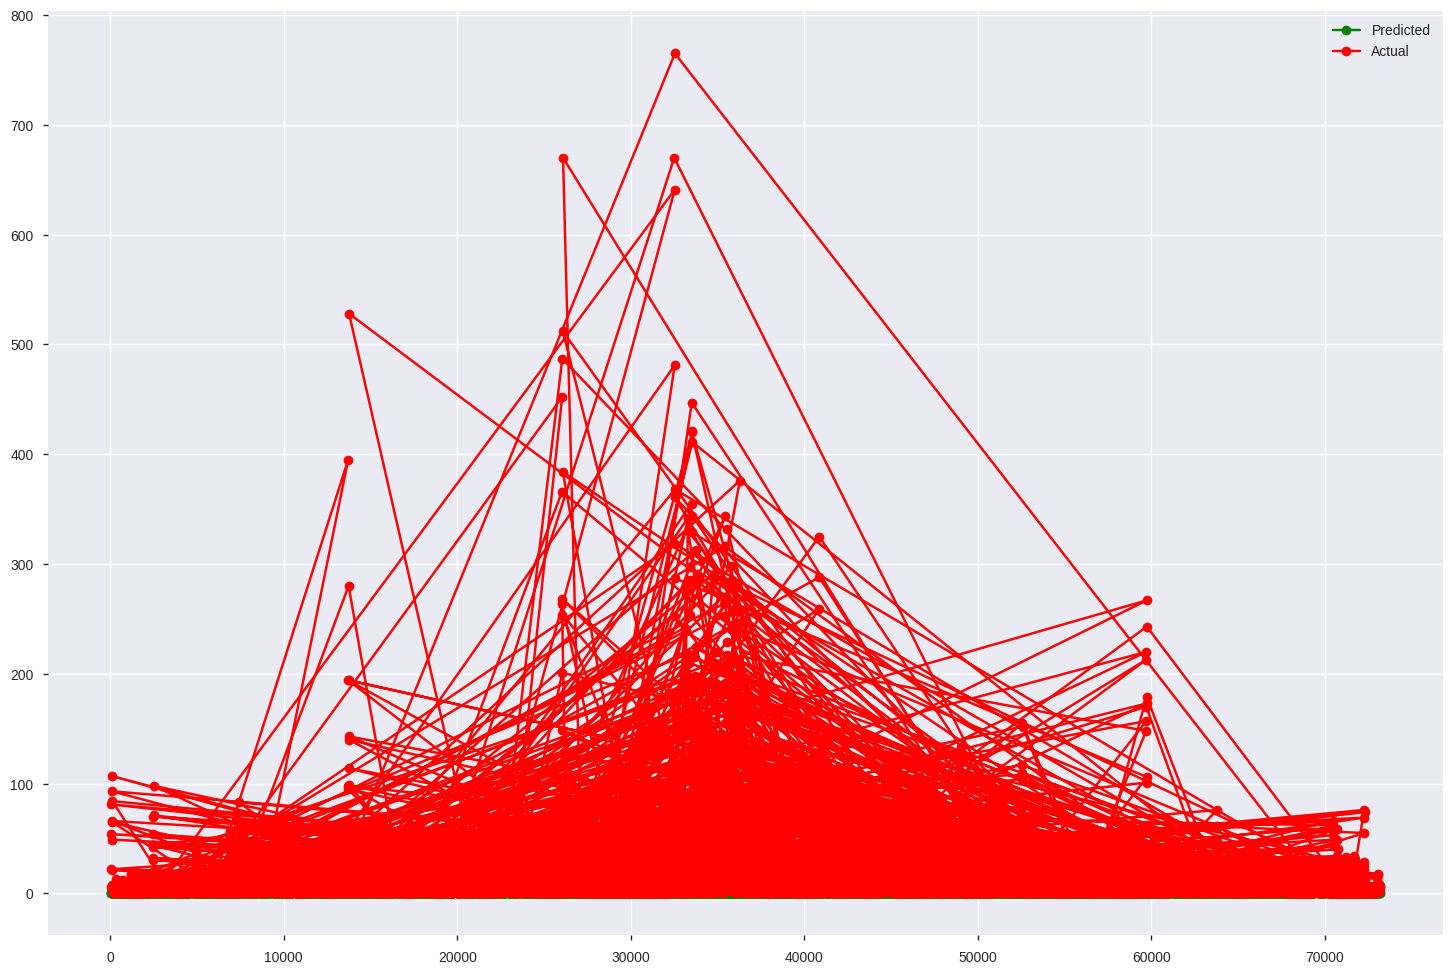

In [100]:
fig = plt.figure()
plt.figure(figsize=(18,12))

fig.suptitle('Predicted versus actual counts using the ZIP model')

predicted, = plt.plot(X_test.index, zip_predictions, 'go-', label='Predicted')

actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual')

plt.legend(handles=[predicted, actual])
plt.show()

<h3><b>Conclusion</b></h3>

Our Multiple Linear Regression Model was the best at predicting whether or not a student would dropout of high school before graduating featuring an R Squared Score of about 74.1%. Also, we deemed it the easiest to interpret based on the rather large data set.

We were able to see that the county were a student was enrolled in had a lot to do on whether or not they dropped out. This probably has to do with the fiscal capabilities of a school district in a particular county and the administration in charge.

Our Poisson and Negative Binomial models featured very high Chi Squared and Deviance scores making them highly inefficient at predicting the response variable.

